# Kelompok 8 Kamis
## Anggota:

<li>Muhammad Fadel Akbar Putra - 2006577492</li>
<li>Nisrina Alifah Sauda - 2006577523</li>
<li>Syamsul Erisandy Arief - 2006577611</li>

## Deskripsi dataset (Nina)

Di sini kami memilih dataset tentang data penjualan mobil bekas yang mana memiliki 13 features dan 1 target, yaitu Price atau harga mobil bekasnya, dataset ini kami ambil dari Kaggle yang mana dapat dilihat pada link <a href="https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction?datasetId=245550&sortBy=voteCount"> ini </a>.Berikut ini merupalan deskripsi dari predictor dan terget dari dataset yang kami pilih:
<lu>
    <li>Name: Nama spesifik dari mobilnya, tetapi di sini akan kami olah lagi supaya hanya berisi mereknya saja</li>
    <li>Location: Lokasi mobil diproduksi</li>
    <li>Year: Tahun mobil diproduksi</li>
    <li>Kilometers_Driven: Seberapa jauh jarak yang sudah ditempuh mobil dalam km</li>
    <li>Fuel_Type: Jenis bahan bakar yng digunakan</li>
    <li>Transmission: Jenis transmisi kendaraan</li>
    <li>Owner_Type: Mobil dipegang oleh pemilik keberapa (1st, 2nd, 3rd, 4th)</li>
    <li>Mileage: Efisiensi atau jarak yang dapat ditempuh dari 1 liter bahan bakar (kmpl)</li>
    <li>Power: Brake horsepower</li>
    <li>Seats: Jumlah kursi</li>
    <li>New_Price: Harga baru mobil</li>
    <li>Price: Harga mobil bekas (target)</li>
</lu>
Alasan kami memilih dataset ini karena prediktor-prediktor yang ada cukup bervariasi dan seimbang,ada yang categorical dan numerical sehingga bagi kami cukup menantang dan asik untuk diolah dan dibuat modelnya.

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (8,4) 
plt.rcParams['font.size'] = 8 
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [271]:
df = pd.read_csv('https://raw.githubusercontent.com/fadelakbarputra19/Car-Used-Prediction-/main/car-used-dataset.csv')

In [272]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [274]:
new_price_null = df['New_Price'].isnull().sum()
new_price_null / df.shape[0] # bisa dicari lagi

0.8631001827546104

Karena jumlah missing value dari kolom New Price sangat tinggi maka akan lebih baik kita drop karena jika kita ubah nilai dari null menjadi mean kolom tersebut malah akan menjadi tidak valid

Kemudian, kita drop juga kolom Unnamed karena secara logika ini hanya seperti id yang unik sehingga tidak berpengaruh secara signifikan atau sama sekali tidak berpengaruh

In [275]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [276]:
df.drop(columns=['New_Price'], axis=1, inplace=True)
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [277]:
headers = df.columns

In [278]:
headers

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

Pada data yang dikenali secara otomatis sebagai data categorical kita coba lihat unique value tiap kolomnya. Apakah ada kemungkinan data yang ada sebenarnya data numeric, tetapi karena satu dan lain hal dikenali sebagai non-numerict (Object), semisal karena ada satuan di tiap barisnya sehingga dikenali sebagai object.

In [279]:
# printing unique value of each column 
for i in headers:
    if(df[i].dtype == 'O'):
        print(i)
        print(df[i].value_counts())
        print(f'Unique value counts: {df[i].unique().shape[0]}')
        print('')

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64
Unique value counts: 1876

Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64
Unique value counts: 11

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
Unique value counts: 5

Transmission
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64
Unique value counts: 2

Owner_Type
First 

Di atas kita bisa lihat unique value dari tipe data Object atau categorical, walaupun ada beberapa kolom yang harusnya numerik tapi masih digolongkan sebagai categorical akibat terdapat satuan di sampelnya.

## Data pre-processing

Terlihat bahwa kolom Mileage, Engine, dan Power sebenarnya adalah kolom yang seharusnya numeric, tetapi malah dikategorikan sebagai kolom Object yang mana ternyata dikategorikan sebagai Object karena satuannya dimasukkan ke tiap data. Terlihat juga jumlah unique value pada ketiga kolom tersebut sangat tinggi (malah seperti numeric)

In [280]:
missing_val = df.isnull()
col_convert = [] # menyimpan kolom degan tipe data Object dan memiliki missing value
print(f'Jumlah missing value pada:')
for i in headers:
    if(df[i].dtype == 'O'):
        if(missing_val[i].value_counts()[0] != missing_val.shape[0]):
            col_convert.append(str(i))
            print(i, missing_val[i].value_counts()[1])        

Jumlah missing value pada:
Mileage 2
Engine 36
Power 36


Terlihat jumlah missing value pada kolom-kolom tersebut sehingga dari dua kode di atas bisa kita simpulkan langkah-langkah selanjutnya adalah:
<ol>
    <li>Ubah kolom Mileage, Engine, dan Power menjadi numeric (float) dengan cara split satuannya</li>
    <li>Replace null value pada kolom tersebut dengan mean kolomnya</li>
</ol>

In [281]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [282]:
# Kolom Name juga akan diambil kompnen String pertamanya saja untuk mengubah Nama mobil menjadi Perusahaannya
col_convert.append('Name') 
for i in range(df.shape[0]):
    for j in col_convert:
        if(type(df.at[i, j]) == str):
            df.at[i,j] = df[j][i].split()[0]

Kita iterasi sebanyak jumlah baris perkolom, apabila ada baris di kolom tertentu yang bertipe data str maka kita pisahkan nilai numericnya dengan satuannya dan ganti baris tersebut dengan nilai numericnya saja. Tidak lupa kita juga pisahkan kolom Name supaya hanya menyisakan merek perusahaannya saja agar jumlah unique value pada kolom Name tidak terlalu banyak.

In [283]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


Terlihat bahwa Kolom Mileage, Engine,, dan Power sudah bersih hanya berisikan nilainya saja tanpa satuan.

In [284]:
(df['Power'] == 'null').sum()

107

Namun, terlihat bahwa pada kolom Power terdapat anomali lagi yang berbeda dengan dua kolom lainnya, yaitu suatu nilai string 'null'. Oleh karena itu, perlu kita replace nilainya dengan NaN

In [285]:
df['Power'].replace('null', np.nan, inplace=True)

Kita hitung mean dari ketiga kolom tersebut kemudian kita replace null value yang ada di ketiga kolom tersebut dengan nilai mean kolomya.

In [286]:
col_convert.remove('Name')
for i in col_convert:
    mean_col = df[i].astype(float).mean()
    df.replace(np.nan, mean_col, inplace=True)

In [287]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [288]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Bisa kita lihat semua kolom akhirnya sudah bersih dari nilai null

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   object 
 8   Engine             6019 non-null   object 
 9   Power              6019 non-null   object 
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


Namun, ada beberapa kolom yang ternyata masih belum sesuai tipe datanya. Oleh karena itu, ubah tipe Mileage, Engine, Power menjadi semestinya, yaitu numeric baik itu int mapun float (sesuaikan)

In [290]:
df['Mileage'] = df['Mileage'].astype(float)
df['Engine'] = df['Engine'].astype(int)
df['Power'] = df['Power'].astype(float)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   int32  
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 540.9+ KB


In [292]:
df.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
unique,31,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN
top,Maruti,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,1211,790,NaN,NaN,3205,4299,4929,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,18.134961,1611.687157,110.993225,5.368445,9.479468
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,4.581528,612.168040,55.167198,1.339822,11.187917
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,18.000000,18.134961,0.000000,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1197.000000,74.000000,5.000000,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,18.150000,1493.000000,91.100000,5.000000,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1969.000000,138.030000,5.000000,9.950000


Pada langkah ini kita sudah selesai pada tahap pre-processing, kita sudah melakukan splitting satuan, menghandle missing value atau pun null dengan mean, dan mengubah tipe data. 

### Normalization and binning (before handling outlier)

Pada tahap ini kami hanya melakukan normalisasi dan binning untuk mencoba-coba saja dan nanti di akhir akan dibandingkan akurasi dari model yang dibuat dengan menggunakan normalisasi dan tanpa normalisasi, sedangkan untuk binning sendiri hanya digunakan untuk memvisualisasikan data numeric dan tidak dimasukkan dalam pengolahan lebih lanjut.

In [293]:
# berikut merupakan kolom-kolom yang akan dinormalisasi
will_norm = df[['Kilometers_Driven', 'Mileage', 'Engine', 'Power']]

In [294]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


In [295]:
for i in range(will_norm.shape[0]):
    for j in will_norm.columns:
        will_norm.loc[i,j] = will_norm.loc[i,j]/will_norm[j].max()

Di sini kita lakukan iterasi untuk kolom-kolom pada variabel will_norm, dimana dilakukan max normalization, yaitu dengan cara membagi tiap sampel dengan nilai maksimum kolom tersebut sehingga sampel yang ada memiliki range [0,1]

In [296]:
will_norm

,Kilometers_Driven,Mileage,Engine,Power
0,0.011077,0.793083,0.166389,0.103857
1,0.006308,0.586464,0.263755,0.225357
2,0.007077,0.542636,0.199900,0.158393
3,0.013385,0.619261,0.208069,0.158500
4,0.006257,0.453190,0.328109,0.251429
...,...,...,...,...
6014,0.273650,1.000000,0.499600,0.660714
6015,1.000000,0.959119,0.448359,0.633929
6016,1.000000,0.550314,1.000000,1.000000
6017,0.978723,0.742925,1.000000,1.000000


Terlihat dari dataframe di atas nilai-nilai datanya sudah berada di range 0 sampai 1

In [297]:
df_bin = pd.DataFrame()

In [298]:
group_names = ['Low', 'Medium', 'High']
for i in will_norm.columns:
    bins = np.linspace(min(df[i]), max(df[i]), 4)
    df_bin[i] = pd.cut(df[i],  bins, labels=group_names, include_lowest=True )

Di sini kita lakukan binning dengan kategori binning adalah Low, Medium, dan High untuk kolom yang dinormalisasi tadi dengan cara melakukan looping.

In [299]:
df_bin

,Kilometers_Driven,Mileage,Engine,Power
0,Low,High,Low,Low
1,Low,Medium,Low,Low
2,Low,Medium,Low,Low
3,Low,Medium,Low,Low
4,Low,Medium,Low,Low
...,...,...,...,...
6014,Low,High,Low,Low
6015,Low,High,Low,Low
6016,Low,Medium,Medium,Low
6017,Low,Medium,Low,Low


Terlihat datafarame yang sudah dilakukan binning kemudian akan kita plot dengan barplot

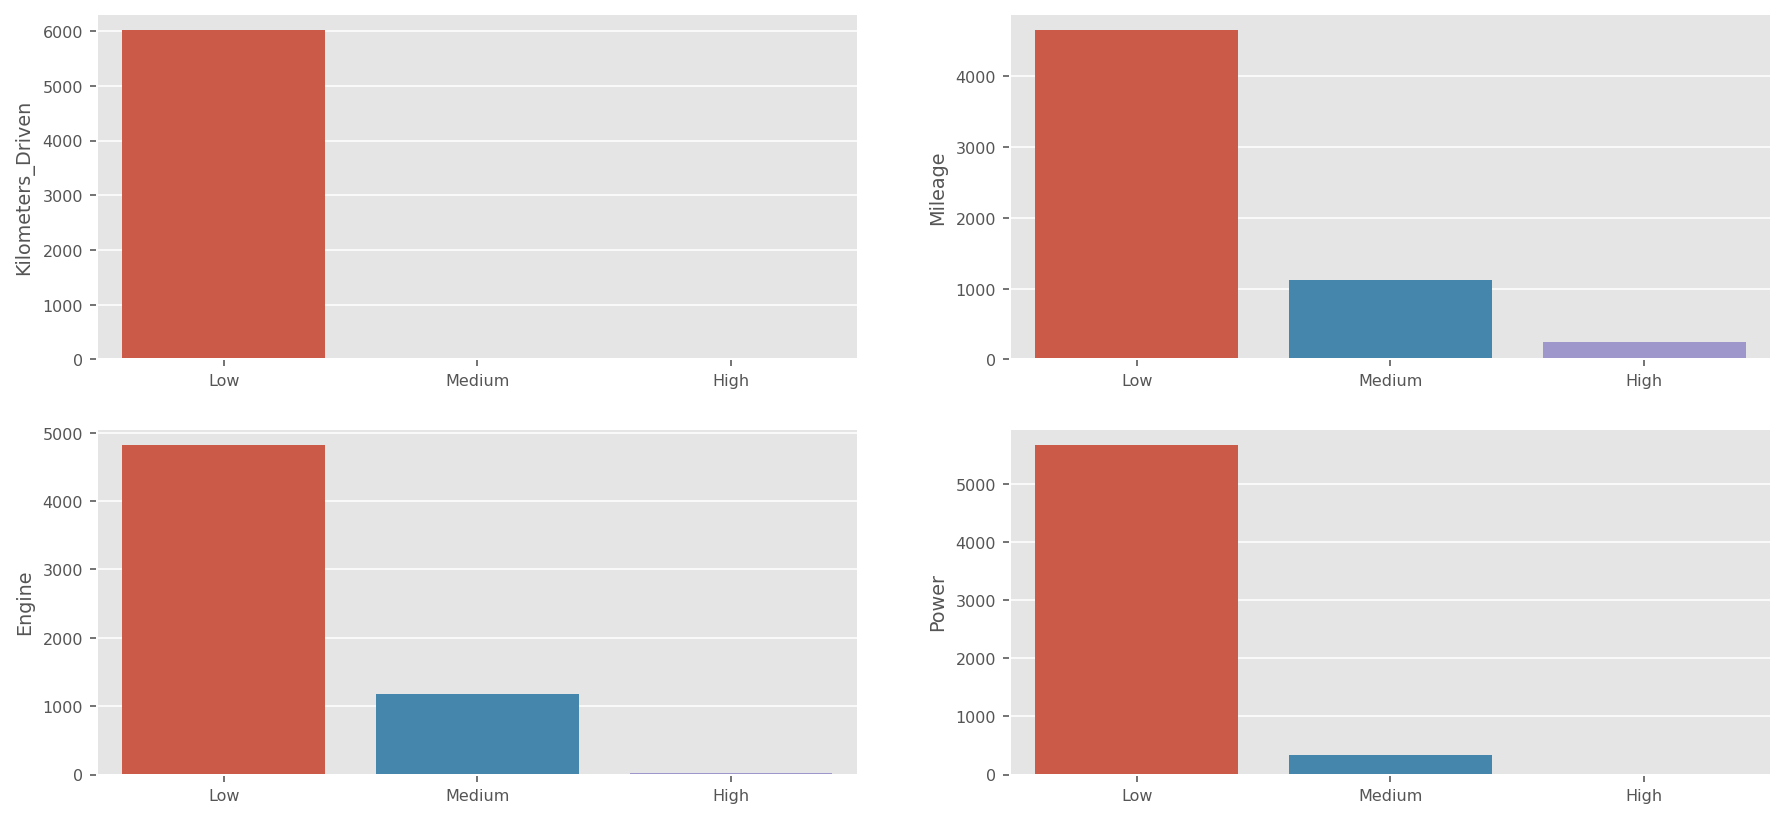

In [300]:
from matplotlib import pyplot
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15, 7)
sns.barplot(group_names, df_bin["Kilometers_Driven"].value_counts(), ax=axes[0,0])
sns.barplot(group_names, df_bin["Mileage"].value_counts(), ax=axes[0,1])
sns.barplot(group_names, df_bin["Engine"].value_counts(), ax=axes[1,0])
sns.barplot(group_names, df_bin["Power"].value_counts(), ax=axes[1,1])
plt.show()

Ternyata setelah diplot terlihat bahwa kebanyakan dikategorikan sebagai Low untuk kolom-kolom will_norm. Bahkan untuk kolom Kilomters Driven distribusi yang dikategorikan sebagai Low sangat tinggi, ini mungkin terjadi karena kita belum menghandle outliernya sehingga saat melakukan binning dan diambil nilai max-nya, yang diambil adalah outlier paling atas.

## EDA (Exploratory Data Analysis) (Syamsul)

In [301]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


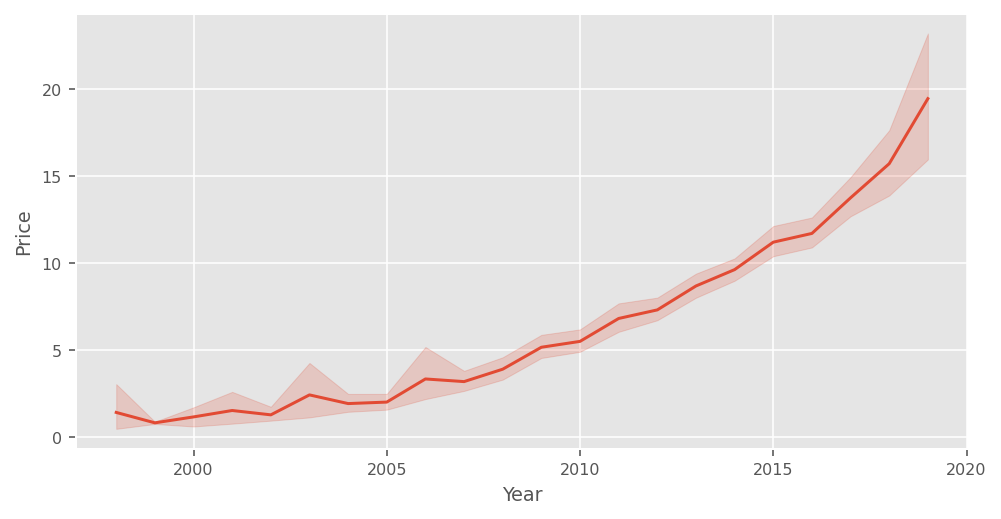

In [302]:
sns.lineplot(data=df, x="Year", y="Price")
plt.show()

Kita plotting dengan Line plot untuk antara Year dan Price untuk melihat perubahan harga bekas seiring berjalannya waktu. Terlihat bahwa semakin baru mobil maka harganya juga akan semakin tinggi.

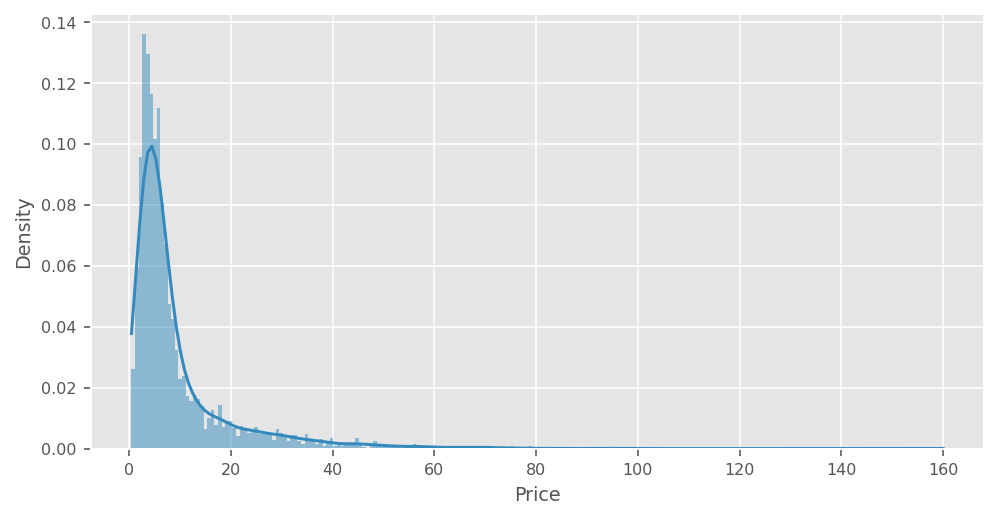

In [303]:
sns.histplot(df['Price'], label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

Kita juga mengeplot distribusi dari Price dengan density graph, dilihat bahwa distribusiya adalah skewed right.

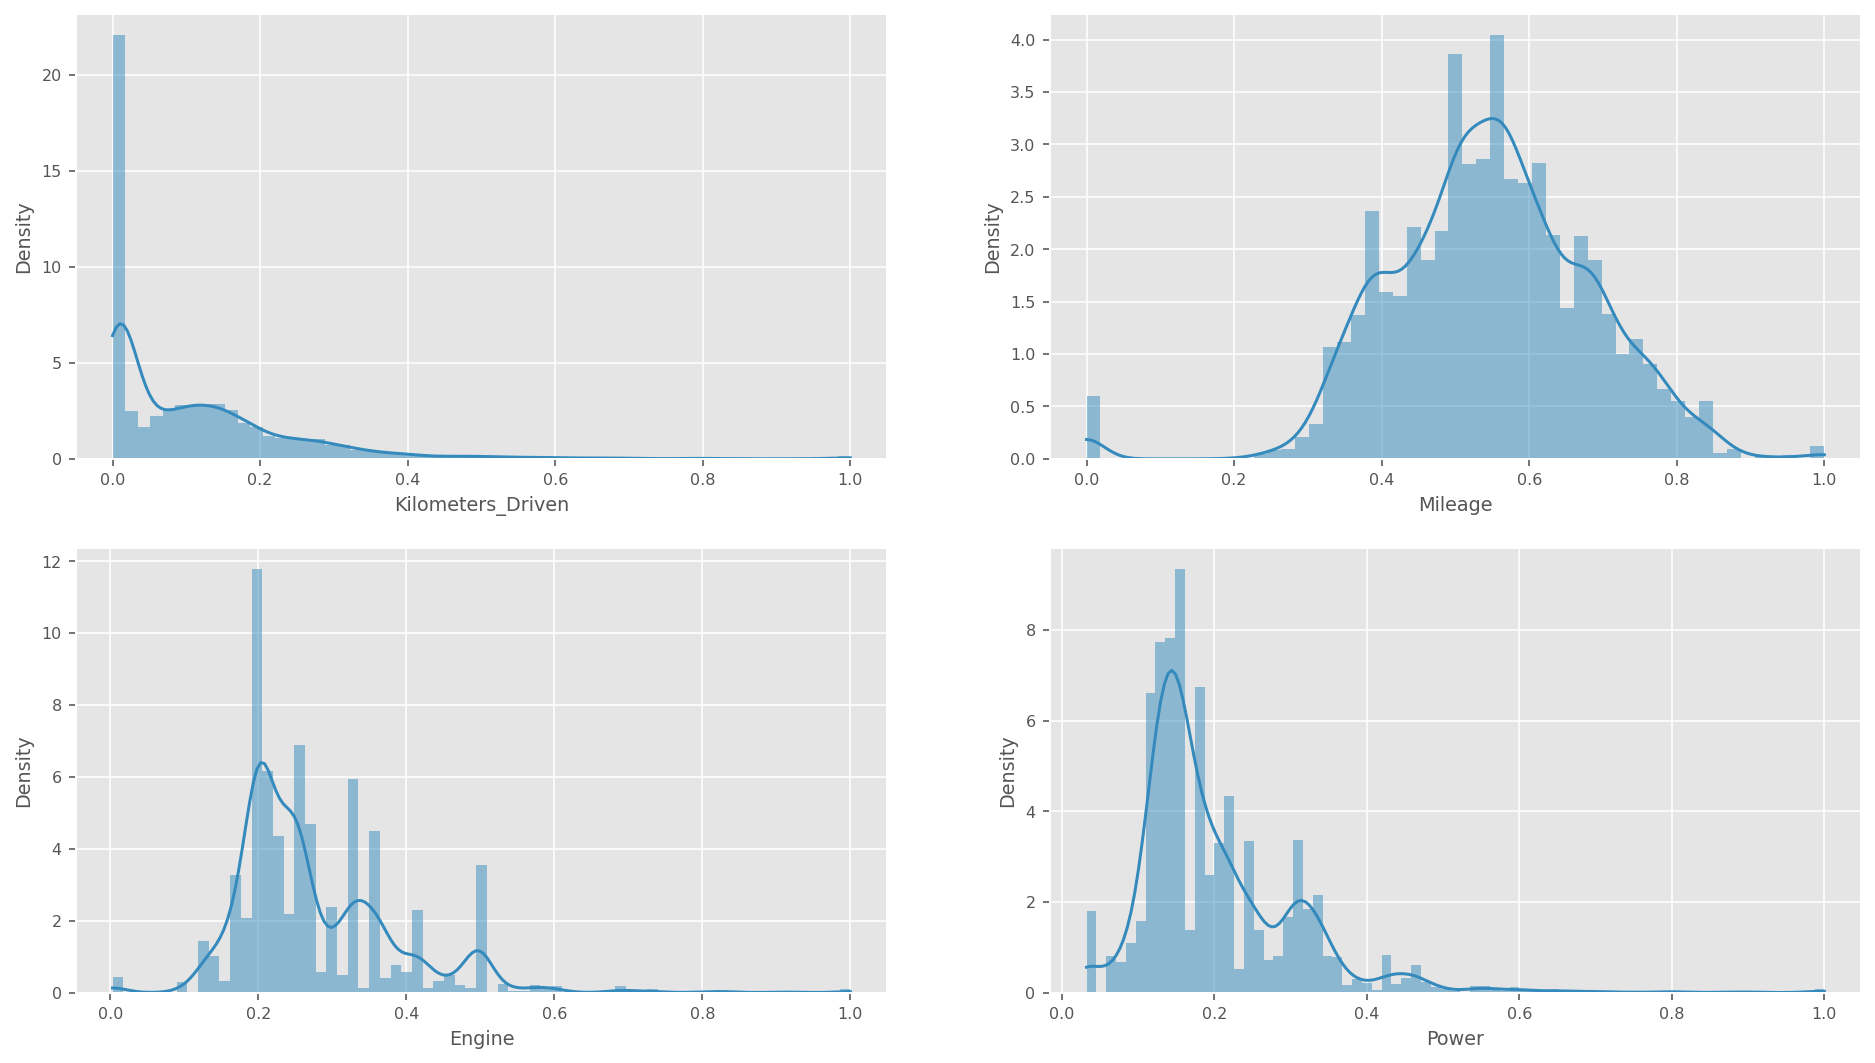

In [304]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
sns.histplot(will_norm['Kilometers_Driven'], ax=axes[0,0], label="100% Equities", kde=True, stat="density", linewidth=0)
sns.histplot(will_norm['Mileage'], ax=axes[0,1], label="100% Equities", kde=True, stat="density", linewidth=0)
sns.histplot(will_norm['Engine'], ax=axes[1,0], label="100% Equities", kde=True, stat="density", linewidth=0)
sns.histplot(will_norm['Power'], ax=axes[1,1], label="100% Equities", kde=True, stat="density", linewidth=0)
#sns.histplot(will_norm['Seats'], ax=axes[2,0], label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

Kemudian kita plot juga distribusi untuk kolom-kolom will_norm yang tadi kita normalisasi (di atas) terlihat bahwa ternyata persebaran datanya cukup tidak gaussian, mungkin hanya Mileage saja yang cukup gaussian, selain itu lebih dekat ke skewed right.Oleh karena itu, di sini kita akan coba untuk meng-handle outliersnya.

[]

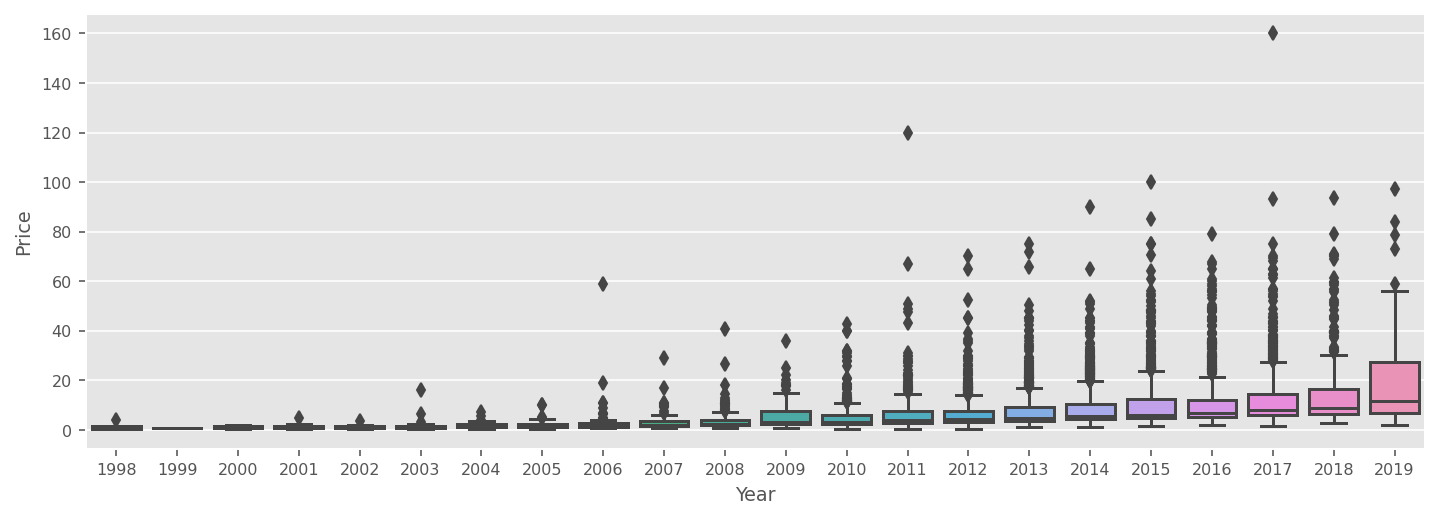

In [305]:
var = 'Year'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 4))
fig = sns.boxplot(x=var, y="Price", data=data)
plt.plot()

### Handle Outliers

In [306]:
df[['Kilometers_Driven', 'Mileage', 'Engine', 'Power']].describe()

,Kilometers_Driven,Mileage,Engine,Power
count,6.019000e+03,6019.000000,6019.000000,6019.000000
mean,5.873838e+04,18.134961,1611.687157,110.993225
std,9.126884e+04,4.581528,612.168040,55.167198
min,1.710000e+02,0.000000,18.000000,18.134961
25%,3.400000e+04,15.170000,1197.000000,74.000000
50%,5.300000e+04,18.150000,1493.000000,91.100000
75%,7.300000e+04,21.100000,1969.000000,138.030000
max,6.500000e+06,33.540000,5998.000000,560.000000


Kita lihat diskirpsi statistik dari kolom Kilometers_Driven, Mileage, Engine, dan Power, terlihat bahwa untuk semua kolom tersebut jarak antara Q3 dengan max sangat jauh sehingga outliers tersebut akan kita handle.

[]

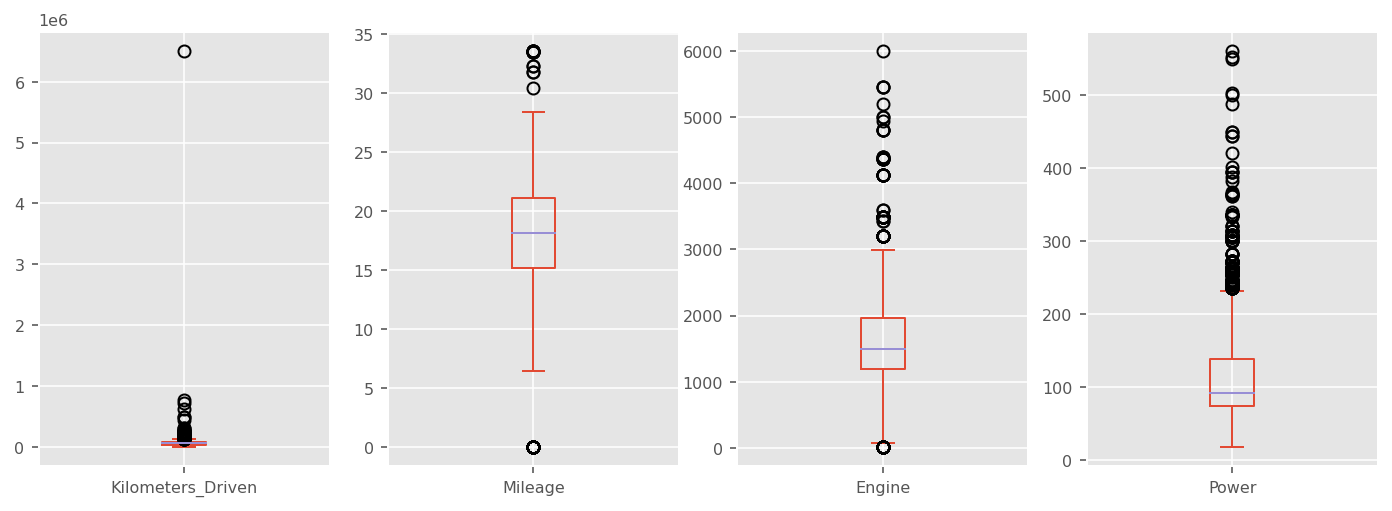

In [307]:
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(12, 4)
df['Kilometers_Driven'].plot(kind='box', ax=axs[0])
df['Mileage'].plot(kind='box', ax=axs[1])
df['Engine'].plot(kind='box', ax=axs[2])
df['Power'].plot(kind='box', ax=axs[3])
plt.plot()

Kita boxplot untuk melihat atau menganalisis secara cepat IQR, Q1, Q3, median, whisker serta outliernya. Terlihat bahwa Mileage bisa dibilang paling Gaussian di antara kolom yang lain, outliersnya sedikit, mediannya berada di tengah box-nya menandakan meidan berada di tengah-tengah 50% data, kemudian panjang whisker atas maupun bawah sama sehingga bisa kita ekspektasikan bahwa Mileage akan terdistribusi Normal. Lanjut, Engine dan Power karena mediannya berada di bawah atau di kiri dan whisker atasnya serta outliersnya banyak di atas maka bisa dibilang Engine skewed right, lalu untuk Engine skewed right juga karena whister atas lebih panjang serta outliernya banyak di atas.

Di bawah ini kita buang outliersnya dengan menggunakan metode percentile sehingga yang mulanya terdapat 6019 baris atau data menjadi 5466 data.

In [308]:
cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.reset_index(drop=True, inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5461,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75
5462,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00
5463,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90
5464,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5.0,2.65


In [309]:
df[['Kilometers_Driven', 'Mileage', 'Engine', 'Power']].describe()

,Kilometers_Driven,Mileage,Engine,Power
count,5466.000000,5466.000000,5466.000000,5466.000000
mean,53574.095134,18.635836,1538.233443,104.752787
std,26931.439415,3.987014,484.445533,41.494677
min,171.000000,8.700000,72.000000,18.134961
25%,33225.750000,16.000000,1197.000000,74.000000
50%,52000.000000,18.600000,1461.000000,88.800000
75%,70692.250000,21.400000,1956.000000,126.240000
max,131000.000000,28.400000,2999.000000,231.100000


[]

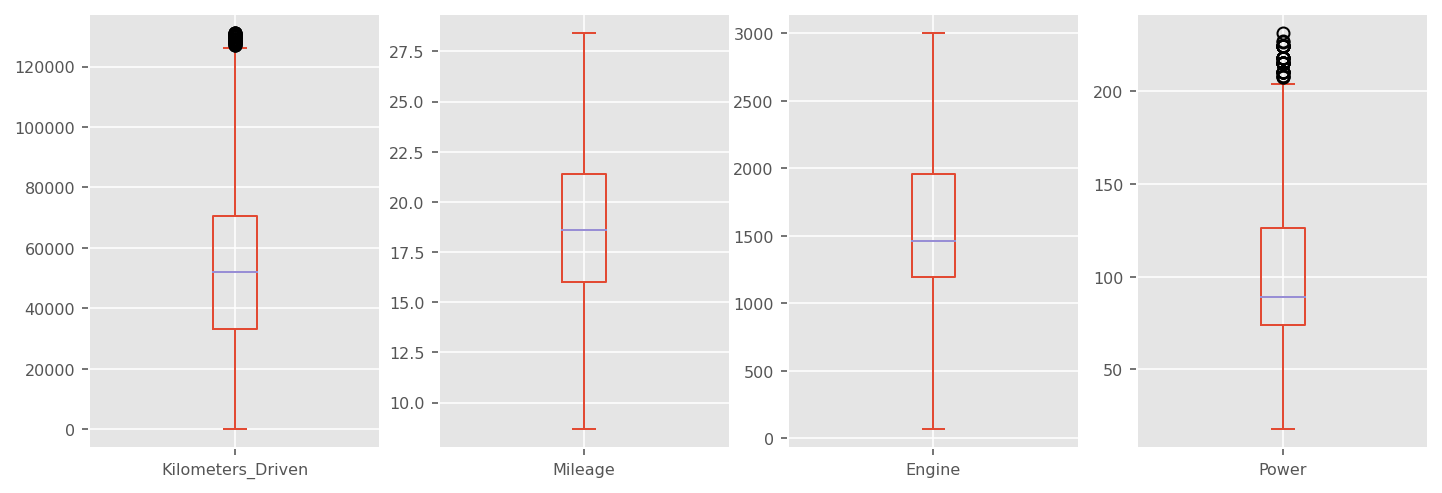

In [310]:
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(12, 4)
df['Kilometers_Driven'].plot(kind='box', ax=axs[0])
df['Mileage'].plot(kind='box', ax=axs[1])
df['Engine'].plot(kind='box', ax=axs[2])
df['Power'].plot(kind='box', ax=axs[3])
plt.plot()

Kita plot lagi dengan boxplot untuk melihat persebaran data setelah outliersnya dibuang, terlihat bahwa titik-titik di atas whisker hampir tidak ada, tetapi untuk Kilometers Driven dan Power masih ada outliersnya, kemungkinan ini terjadi karena range dari IQR juga berubah sehingga yang tadinya tidak dikategorikan sebagai outlier, seakrang malah menjadi outlier.

### Normalization and binning (after handling outlier)

In [311]:
will_norm = df[['Kilometers_Driven', 'Mileage', 'Engine', 'Power']]
for i in range(will_norm.shape[0]):
    for j in will_norm.columns:
        will_norm.loc[i,j] = will_norm.loc[i,j]/will_norm[j].max()

Di sini kita coba lagi normalisasi keempat variabel yang sebelumnya kuta sudah binning untuk melihat perbedaannya sebelum dan sesudah dilakukan penghilangan outliers.

In [312]:
will_norm.head()

,Kilometers_Driven,Mileage,Engine,Power
0,0.549618,0.936620,0.332778,0.251666
1,0.312977,0.692606,0.527509,0.546084
2,0.351145,0.640845,0.399800,0.383817
3,0.664122,0.731338,0.416139,0.384076
4,0.310458,0.535211,0.656219,0.609260


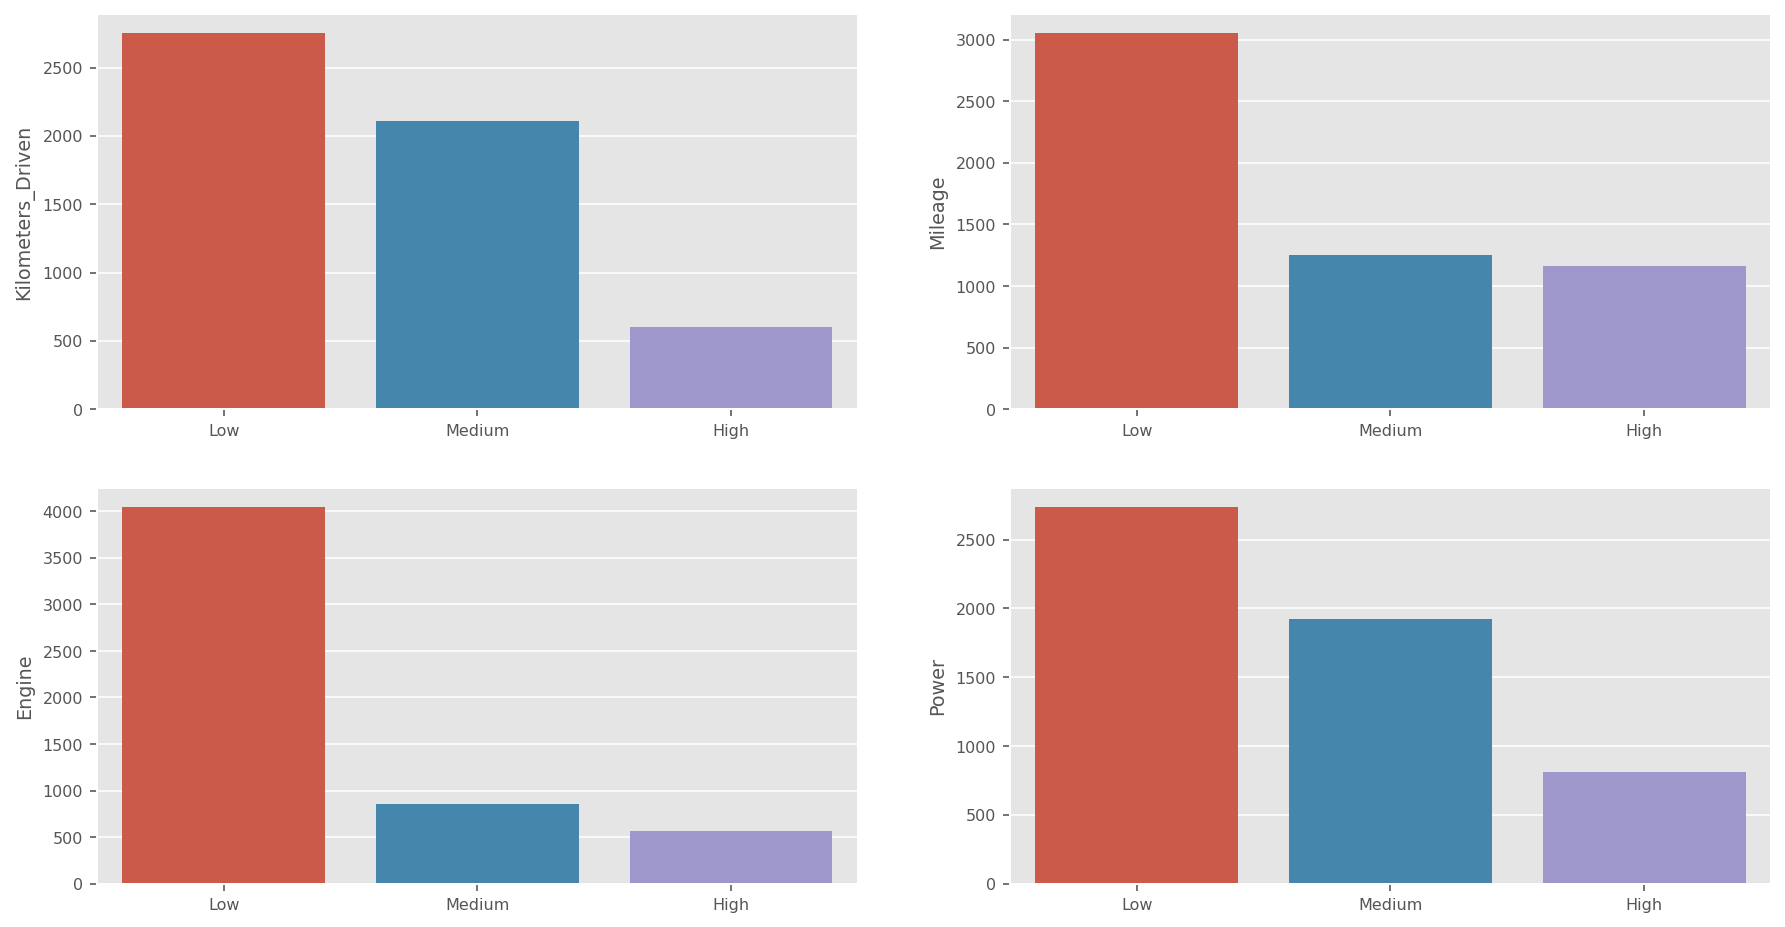

In [313]:
### Binning
df_bin = pd.DataFrame()
n_rows = 2
n_cols = 2
group_names = ['Low', 'Medium', 'High']
for i in will_norm.columns:
    bins = np.linspace(min(df[i]), max(df[i]), 4)
    df_bin[i] = pd.cut(df[i],  bins, labels=group_names, include_lowest=True )
plt.figure(figsize=(15,8))
for i, j in enumerate(will_norm) :
    ax = plt.subplot(n_rows, n_cols, i+1)
    sns.barplot(group_names, df_bin[j].value_counts())
plt.show()

Terlihat bahwa untuk binning yang sama, yaitu Low, Medium, dan High didapatkan bahwa hasilnya persebarandatanya atau distribusinya sudah lebih bervariasi, tidak tersebar pada Low saja.

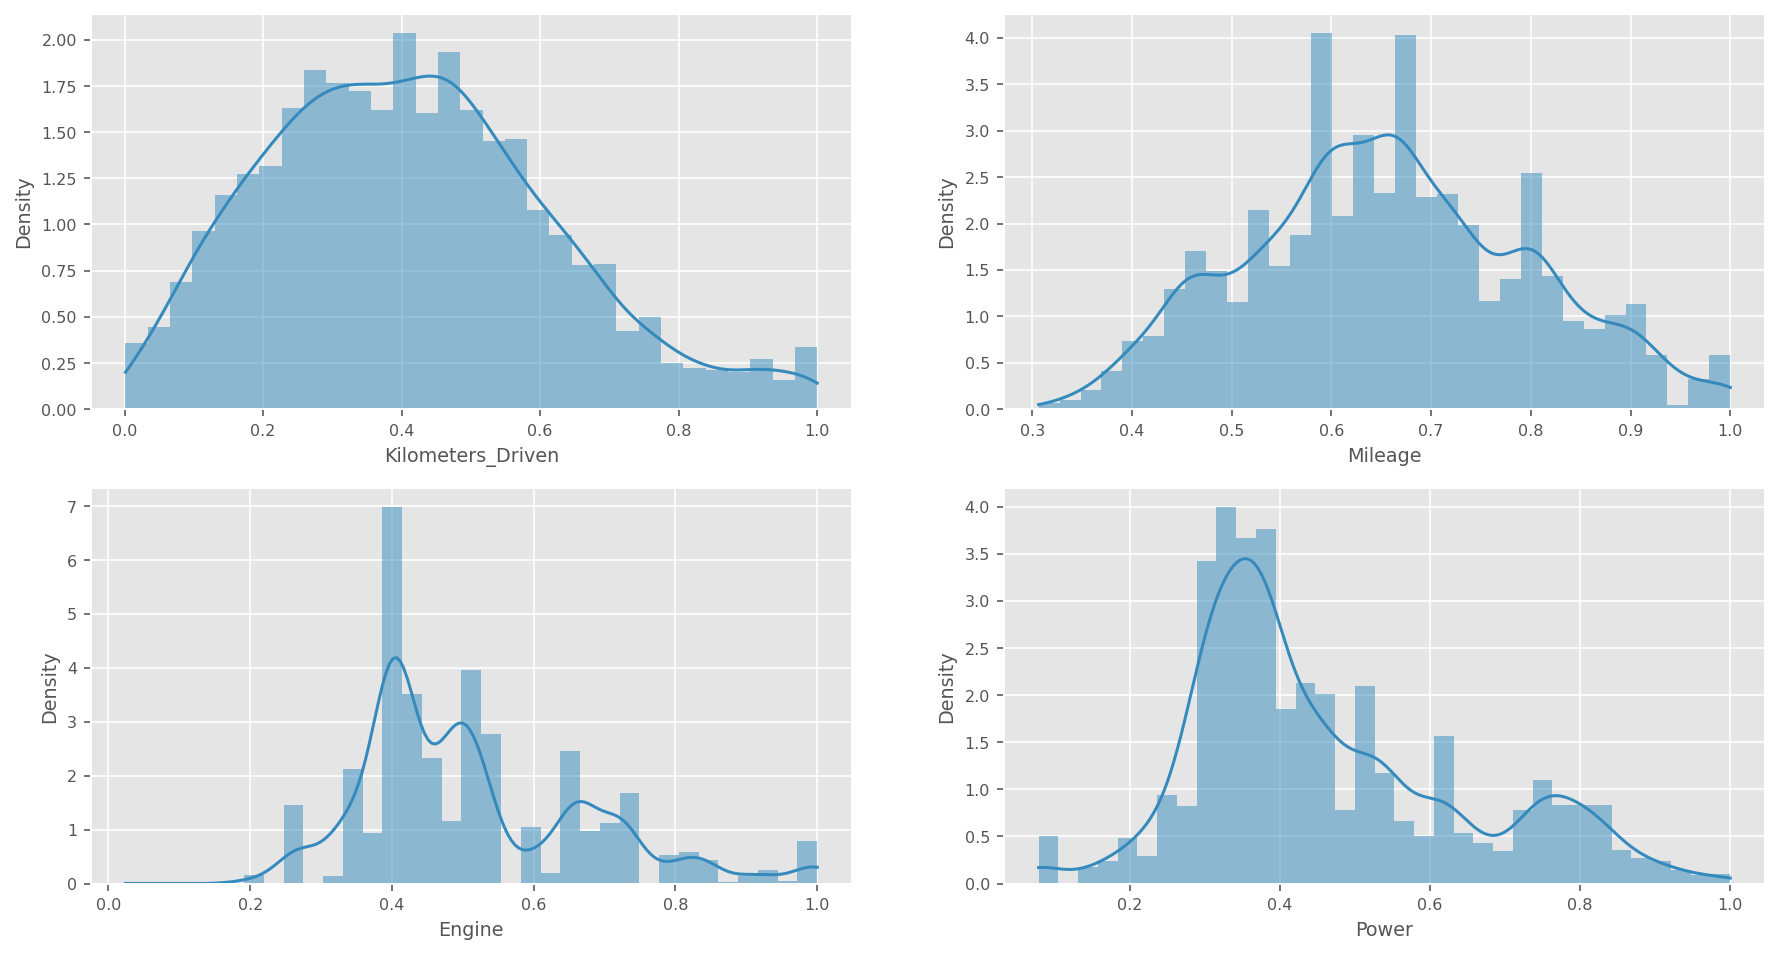

In [314]:
norm_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']
nrows = 2
ncols = 2
plt.figure(figsize=(15,8))
for i, j in enumerate(norm_cols) :
    ax = plt.subplot(nrows, ncols, i+1)
    sns.histplot(will_norm[j], label="100% Equities", kde=True, stat="density", linewidth=0)

Kemudian jika kita plot density-nya atau persebaran datanya terlihat bahwa variabel-varibel di atas menjadi lebih gaussian, yang sebelumnya lebih ke skewed right.

### Working with continous features (Pearson)

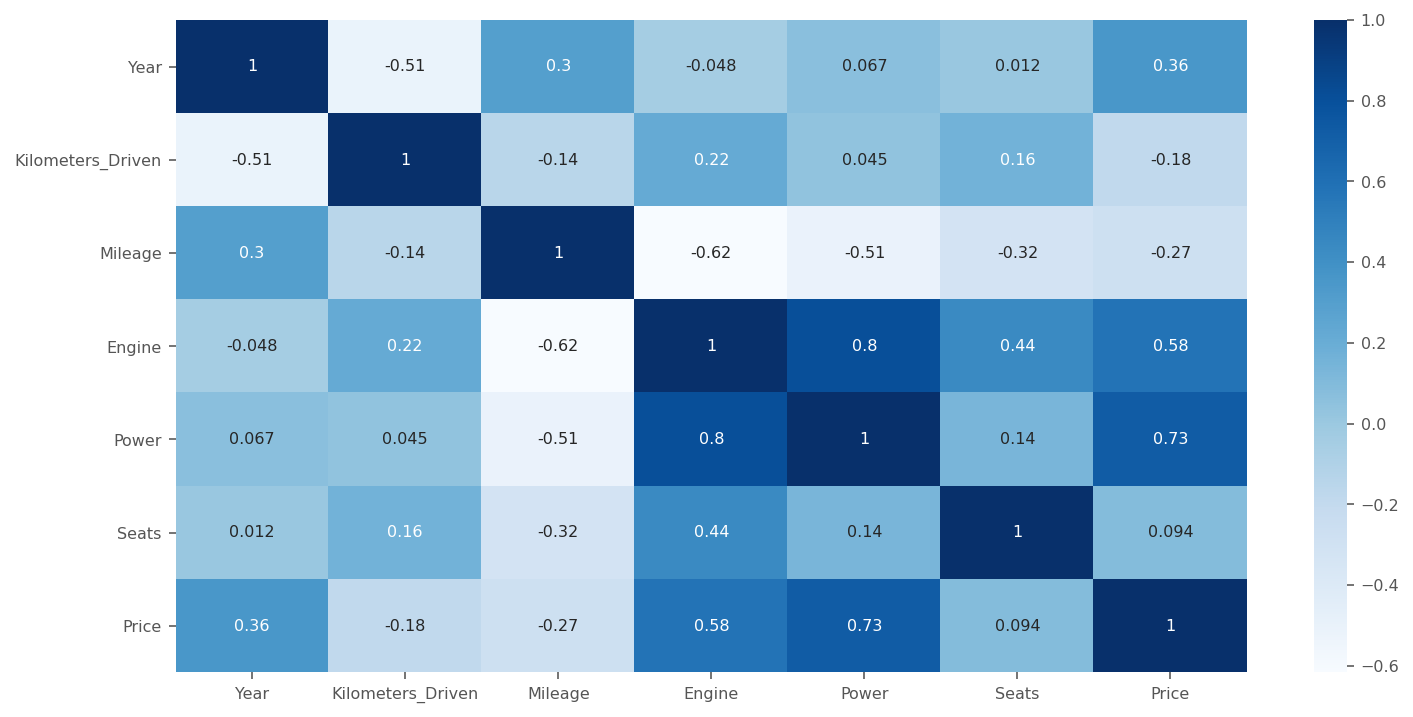

In [315]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

Lanjut ke tahap berikutnya adalah menganalisis korelasi antara numeric variabel, khususnya predictor variabels dengan target kita, yaitu Price dengan heatmap. Kita bisa lihat pearson correaltionnya pada matrix correlation di atas, cukup lihat kolom terakhir atau baris terakhir untuk melihat hubungan predictor dengan Price. Terlihat bahwa korelasi prdictor cukup, semuanya hampr lebih besar/kecil dari +-0.2 kecuali untuk seats dan Kilometrs_Driven, karena itu lanjut kita bisa test dengan t-test walaupun korelasi kecil, tetapi jika p-value < 0.05 masih mungkin kita pakai.

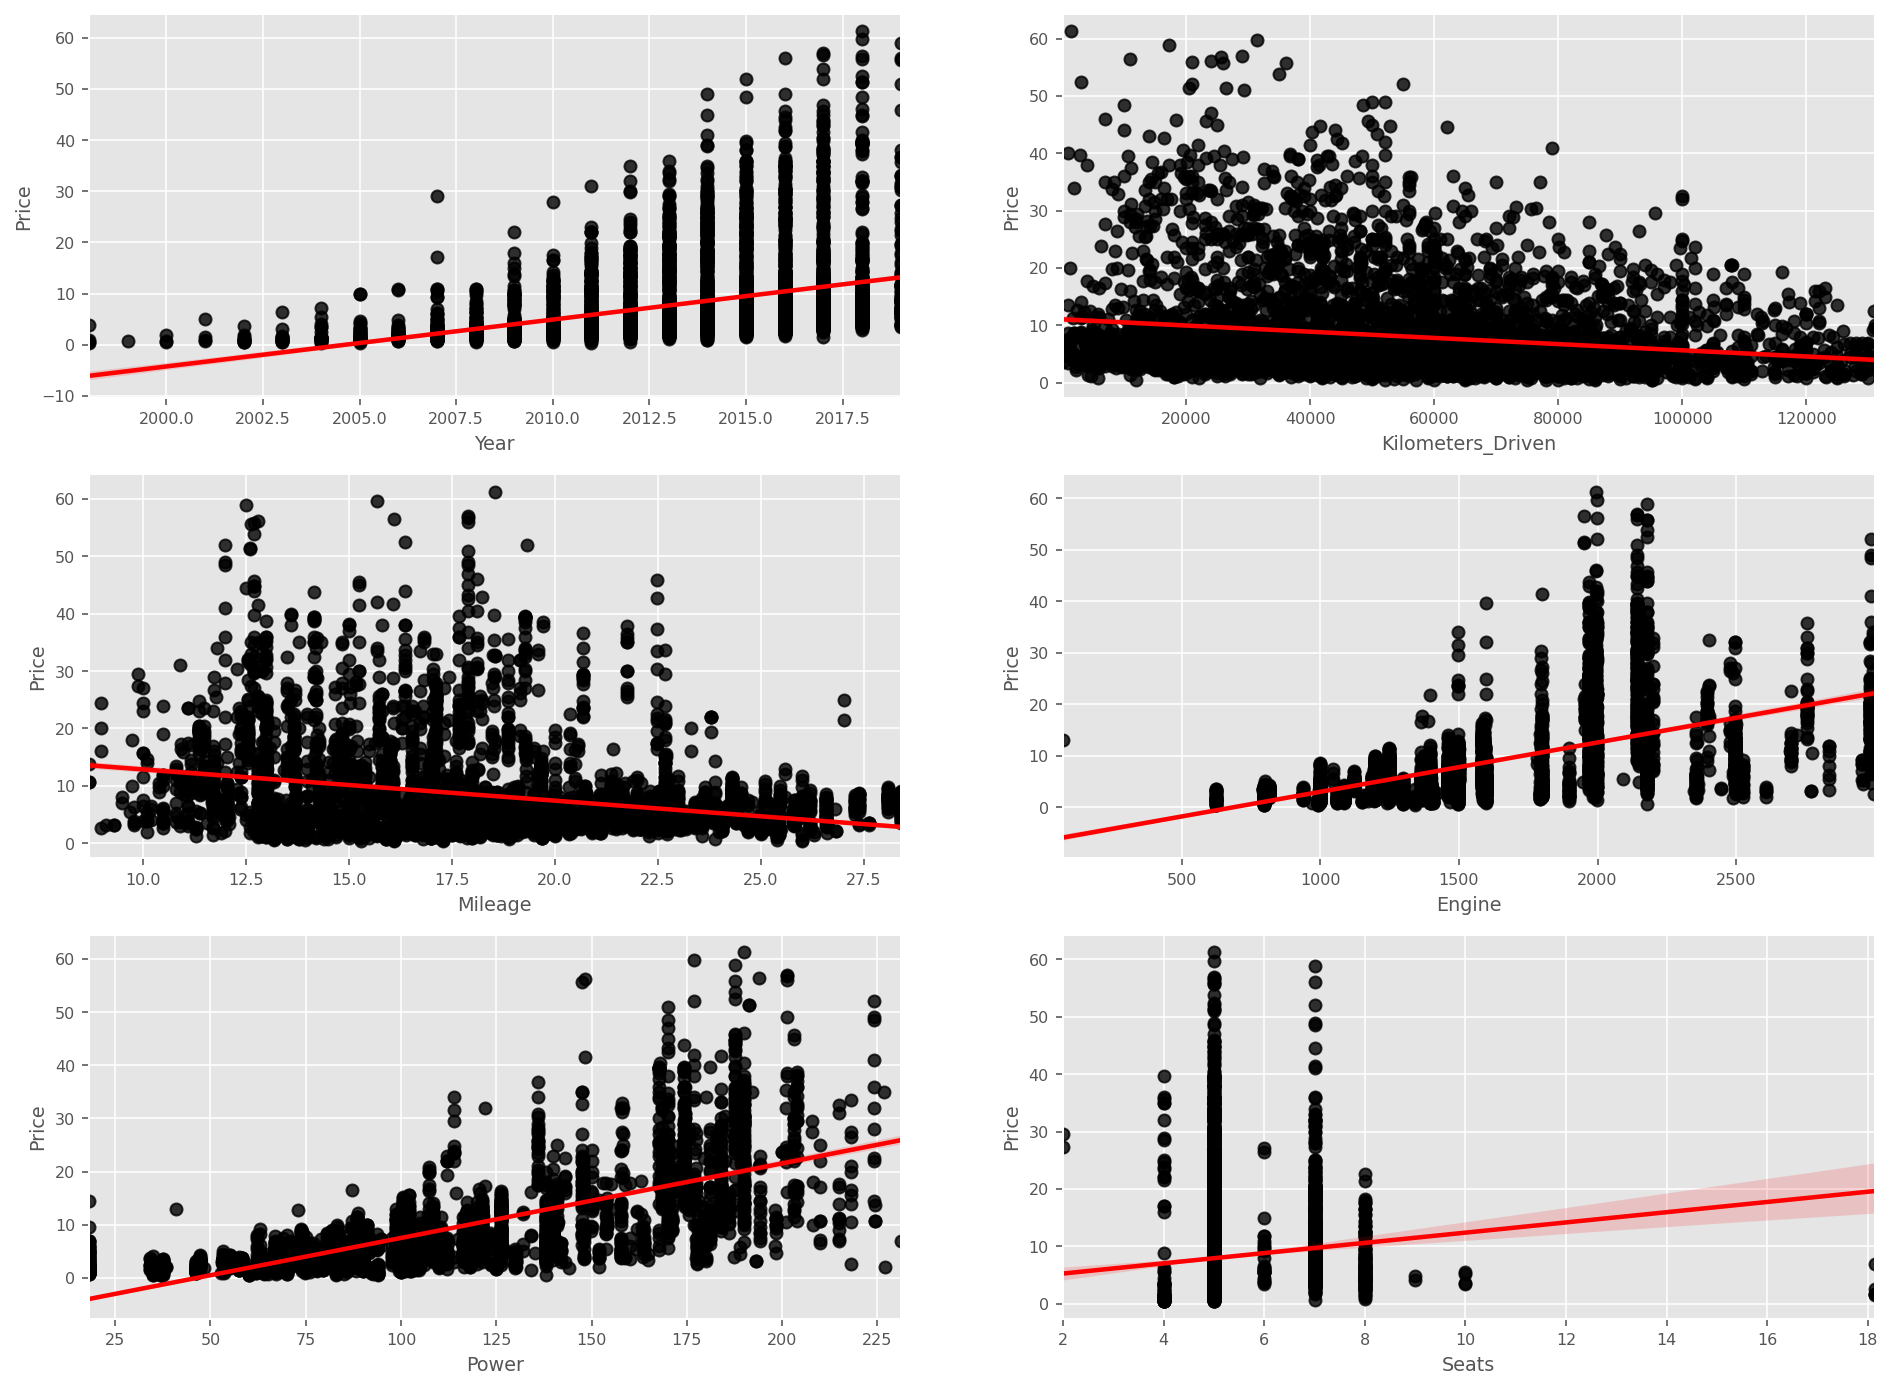

In [431]:
continous_col = ['Year','Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
nrows = 3
ncols = 2
plt.figure(figsize=(16,12))
for i, j in enumerate(continous_col) :
    ax = plt.subplot(nrows, ncols, i+1)
    sns.regplot(x=j, y='Price', data=df,ax=ax, color='blue', scatter_kws={"color": "black"}, line_kws={"color": "red"})

Untuk meliat korelasinya secara visual kita bisa memuat scatter plot antara semua numeric features dengan Price. terlihat pada Year dan Seats sebeanrnya nilainya discrete numeric sehingga persebarannya lebih seperti barplot daripada histrogram, tetapi tidak apa.

In [317]:
from scipy import stats

In [318]:
for i in continous_col:
    pearson_coef, p_value = stats.pearsonr(df[i], df['Price'])
    print(f"Pearson coef {i}-Price:", pearson_coef, "p-value=", p_value)  

Pearson coef Year-Price: 0.36134629927769807 p-value= 2.898233318961057e-168
Pearson coef Kilometers_Driven-Price: -0.18165884193053922 p-value= 9.053522585434464e-42
Pearson coef Mileage-Price: -0.27150629269044796 p-value= 5.544603728930496e-93
Pearson coef Engine-Price: 0.5799435976104655 p-value= 0.0
Pearson coef Power-Price: 0.7273447571888945 p-value= 0.0
Pearson coef Seats-Price: 0.09362493489078033 p-value= 4.045833471302856e-12


Kita lakukan looping saja untuk melihat nilai p-value dari numeric value dengan price. Terlihat bahwa nilai p-value dari numeric features-nya < 0.05 semua. Oleh karena itu, bisa dikatakan bahwa ada pengaruh yang signifikan antara featurs dengan target variabel.

### Working with categorical data (ANOVA) & One hot encoding 
Melihat apakah nilai-nilai unik pada tiap categorical data memiliki pengaruh terhadap harga dengan melihat apakah ada perbedaan yang signifikan pada rata-rata harga di tiap grup categorical

In [319]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

### Location 

[]

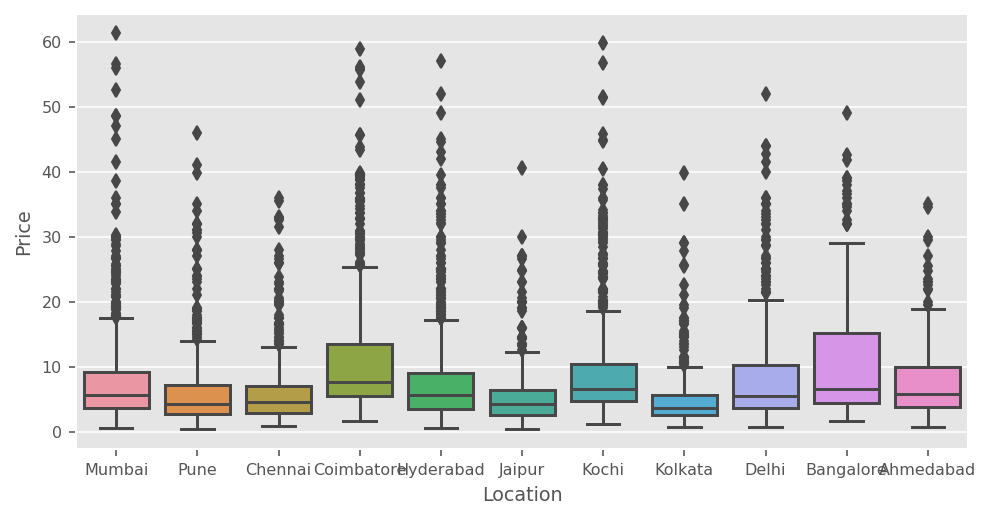

In [320]:
data = pd.concat([df['Price'], df['Location']], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x='Location', y="Price", data=data)
plt.plot()

Kita lihat persebaran harganya untuk tiap-tiap grup pada Location dengan menggunakan box plot, terlihat bahwa tiap box bisa dibilang overlap satu sama lain sehingga secara cepat bisa dikatakan bahwa tidak cukup ada pengaruh/perbedaan yang signifikan anatara lokasi dari mana dengan harga, dan boxplot juga terlihat skewd right semua.

In [321]:
# ANOVA
mod = ols('Price~Location', data=df).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
Location,10.0,21950.304454,2195.030445,36.480281,7.638347e-70
Residual,5455.0,328229.136259,60.170327,NaN,NaN


Hasilnya setelah kita lakukan ANOVA untuk semua grup dapat dilihat bahwa nilai p-valuenya < 0.05 maka bisa dikatakan bahwa masing-masing grup memiki perbedaan yang signifikan terhadap harga.

In [322]:
location_dummy = pd.get_dummies(df['Location'], drop_first=True)
location_dummy.head()

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


Karena menurut kami lokasi ini bukan ordinal atau tidak bisa diranking maka cukup gunakan one hot encoding saja.

### Fuel_type 

[]

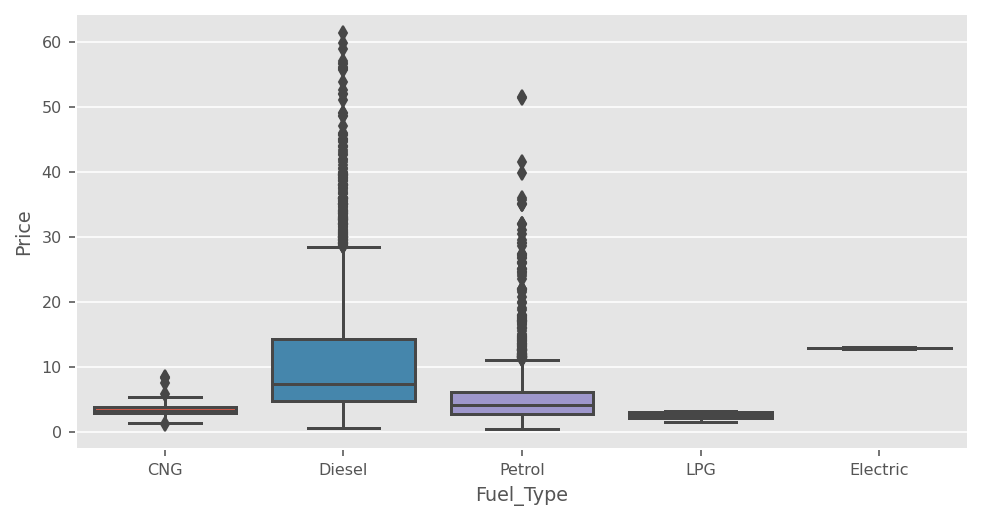

In [323]:
data = pd.concat([df['Price'], df['Fuel_Type']], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x='Fuel_Type', y="Price", data=data)
plt.plot()

Sama seperti sebelumnya, kita plotting dengan boxplot untuk melihat persebaran harga pada tiap-tiap kategori Fuel_Type, terlihat bahwa Diesel dan Petrol mempunyai outliernya yang cukup banyak dan semuanya terdistribusi skewed right.

In [324]:
# ANOVA
mod = ols('Price~Fuel_Type', data=df).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
Fuel_Type,4.0,47908.948927,11977.237232,216.387952,1.283885e-172
Residual,5461.0,302270.491786,55.350758,NaN,NaN


Kita lihat hasil p-valuenya dengan ANOVA, didapatkan bahwa nilainya < 0.05 sehingga bisa kita pakai.

In [325]:
fuel_dummy = pd.get_dummies(df['Fuel_Type'], drop_first=True)
fuel_dummy.head()

,Diesel,Electric,LPG,Petrol
0,0,0,0,0
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0


Kita ubah juga categorical data tersebut ke bentuk one hot encodingnya

### Transmission

[]

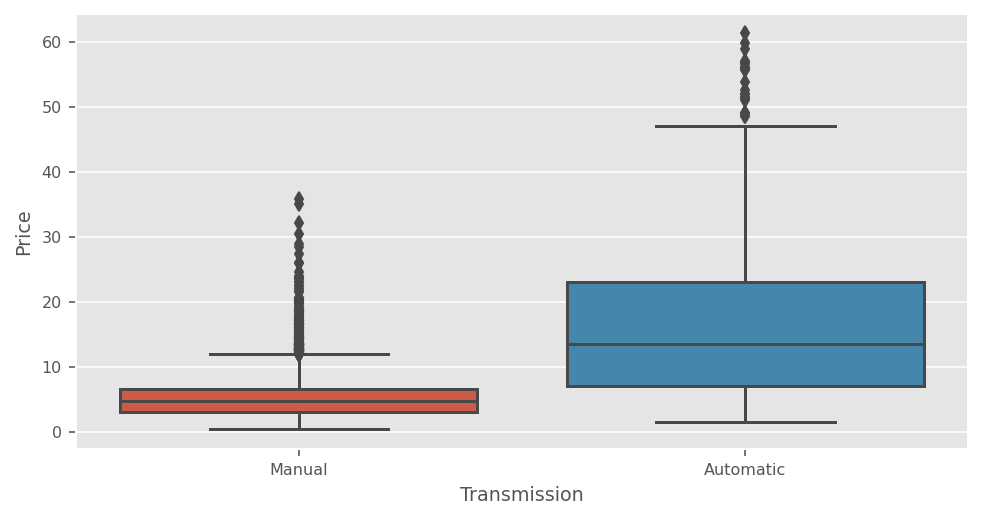

In [326]:
data = pd.concat([df['Price'], df['Transmission']], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x='Transmission', y="Price", data=data)
plt.plot()

Sama seperti sebelumnya, kita buat boxplotny dan terlihat bahwa berbeda dengan dua boxplot di atas bahwa hasilnya cukup menjunjukan ada perbedaan antar price dan grup transmission karena tidak overlap walaupun distribusinya masih saja skewed right

In [327]:
# ANOVA
mod = ols('Price~Transmission', data=df).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
Transmission,1.0,121951.430216,121951.430216,2919.635558,0.0
Residual,5464.0,228228.010497,41.769402,NaN,NaN


In [328]:
transmission_dummy = pd.get_dummies(df['Transmission'], drop_first=True)
transmission_dummy.head()

,Manual
0,1
1,1
2,1
3,1
4,0


Terlihat bahwa nilai p-valuenya setelah dilakukan anova juga < 0.05 sehingga bisa pakai feature ini dan kita lakukan one hot encoding untuk mengubahnya menjadi numeric, sebagai tambahan bahwa one hot encoding akan membuat kolom baru seanya n-1, dimana n adalah jumlah categorical datanya.

### Name

[]

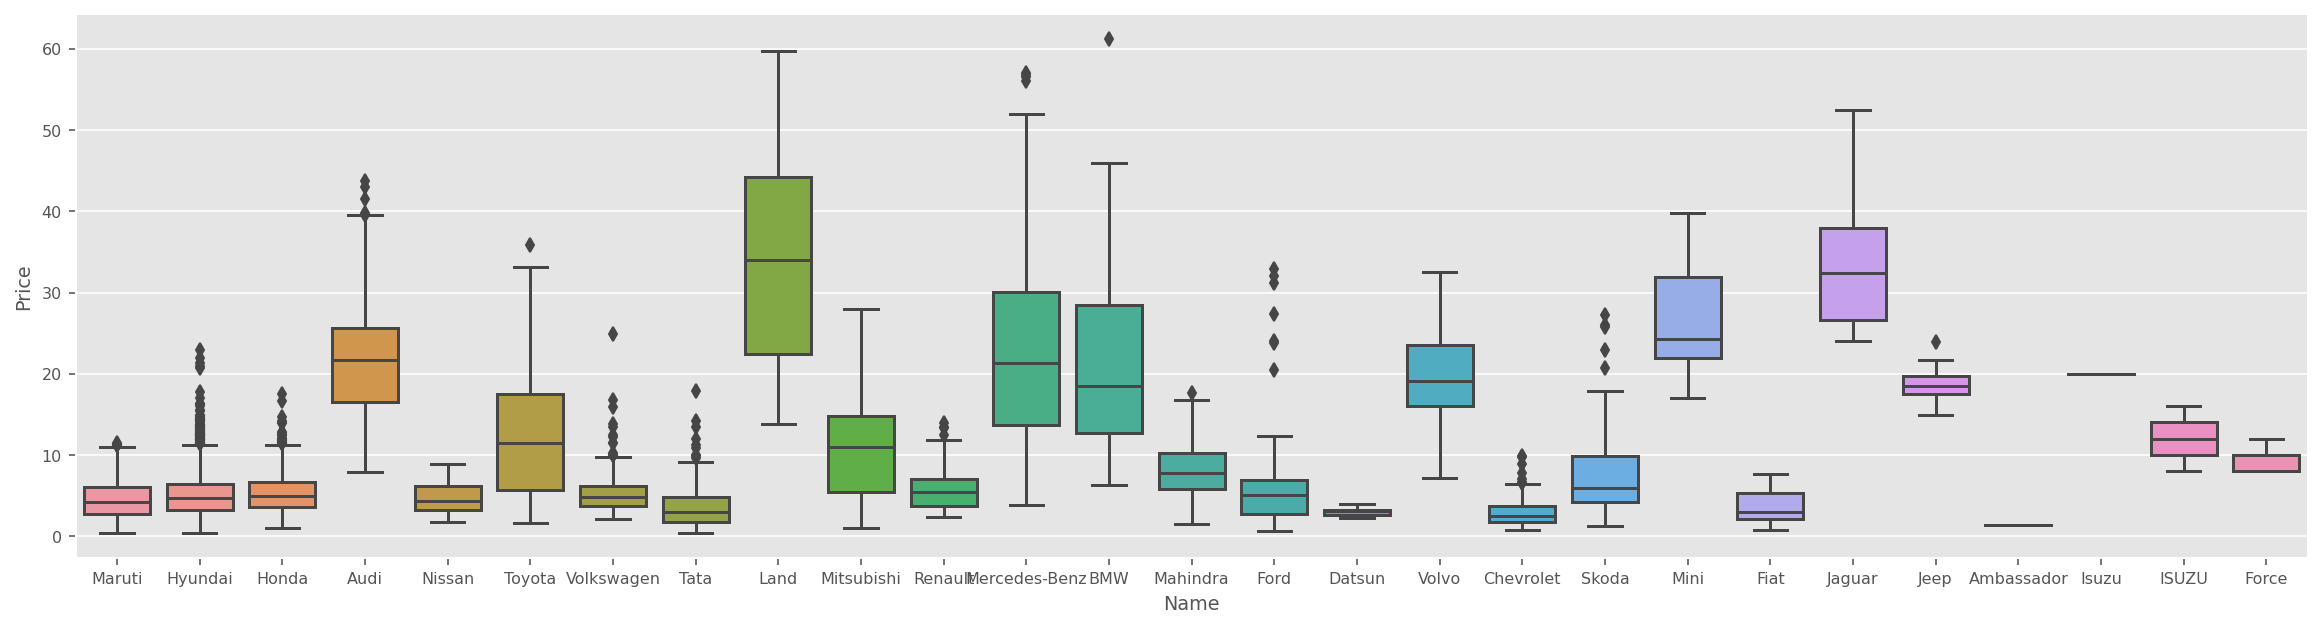

In [329]:
data = pd.concat([df['Price'], df['Name']], axis=1)
f, ax = plt.subplots(figsize=(20, 5))
fig = sns.boxplot(x='Name', y="Price", data=data)
plt.plot()

In [330]:
# ANOVA
mod = ols('Price~Name', data=df).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
Name,26.0,218583.560841,8407.060032,347.472881,0.0
Residual,5439.0,131595.879872,24.194867,NaN,NaN


In [331]:
name_dummy = pd.get_dummies(df['Name'], drop_first=True)
name_dummy.head()

,Audi,BMW,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,...,Mercedes-Benz,Mini,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
df.Name.unique().size

27

### Owner_Type (label encoding)
Di sini, Owner_Type bertipe ordinal bukan nominal karena kategorinya bisa diranking sehingga di sini yang dilakukannya adalah label encoding

In [333]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [334]:
final_df = df.replace({'First':4, 'Second':3, 'Third': 2, 'Fourth & Above':1})
final_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,4,26.60,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,4,19.67,1582,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,4,18.20,1199,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,4,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,3,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5461,Maruti,Delhi,2014,27365,Diesel,Manual,4,28.40,1248,74.00,5.0,4.75
5462,Hyundai,Jaipur,2015,100000,Diesel,Manual,4,24.40,1120,71.00,5.0,4.00
5463,Mahindra,Jaipur,2012,55000,Diesel,Manual,3,14.00,2498,112.00,8.0,2.90
5464,Maruti,Kolkata,2013,46000,Petrol,Manual,4,18.90,998,67.10,5.0,2.65


In [335]:
final_df = pd.concat([final_df, location_dummy, fuel_dummy, transmission_dummy, name_dummy], axis=1)
final_df = final_df.drop(['Name', 'Location', 'Fuel_Type', 'Transmission'], axis=1)
final_df

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Bangalore,Chennai,...,Mercedes-Benz,Mini,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2010,72000,4,26.60,998,58.16,5.0,1.75,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,4,19.67,1582,126.20,5.0,12.50,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,4,18.20,1199,88.70,5.0,4.50,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,4,20.77,1248,88.76,7.0,6.00,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,3,15.20,1968,140.80,5.0,17.74,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,2014,27365,4,28.40,1248,74.00,5.0,4.75,0,0,...,0,0,0,0,0,0,0,0,0,0
5462,2015,100000,4,24.40,1120,71.00,5.0,4.00,0,0,...,0,0,0,0,0,0,0,0,0,0
5463,2012,55000,3,14.00,2498,112.00,8.0,2.90,0,0,...,0,0,0,0,0,0,0,0,0,0
5464,2013,46000,4,18.90,998,67.10,5.0,2.65,0,0,...,0,0,0,0,0,0,0,0,0,0


## Build model (Fadel)
Di sini kita akan membuat 4 model, yaitu:
<lu>
    <li>Simple Linear Regression</li>
    <li>Multiple Linear Regression</li>
    <li>Simple Polynomial Regression</li>
    <li>Multivariable Polynomial Linear Regression</li>
</lu>

In [336]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Simple linear regression
$$
Yhat = a + b  X
$$

In [337]:
y = final_df['Price'].to_numpy().reshape(-1,1)
x = final_df['Power'].to_numpy().reshape(-1,1)

Di sini kita ambil predictornya yang memiliki pearson correlation terbesar dengan Price, yaitu Power.

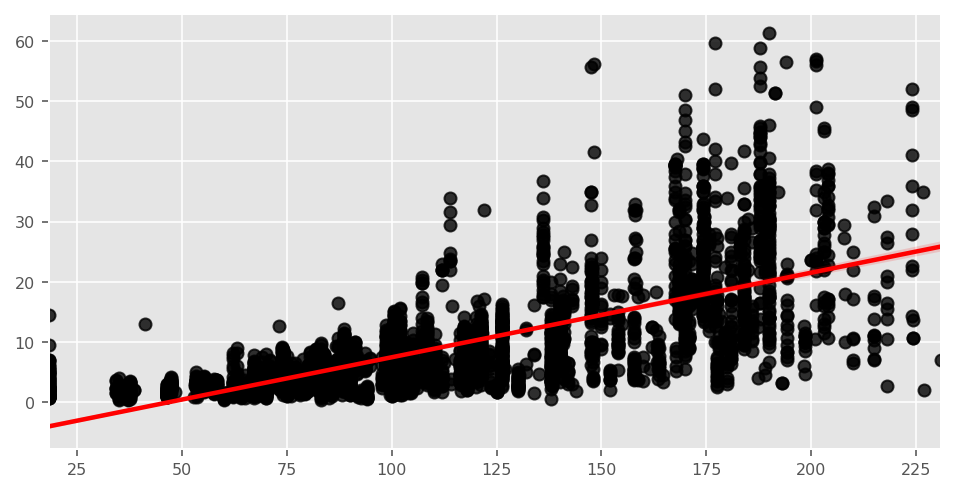

In [338]:
sns.regplot(x, y, color='blue', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

In [339]:
final_df[['Power', 'Price']].corr()

,Power,Price
Power,1.000000,0.727345
Price,0.727345,1.000000


In [340]:
reg = LinearRegression()
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=19)
reg.fit(x,y)
reg.coef_, reg.intercept_

(array([[0.14031308]]), array([-6.53120137]))

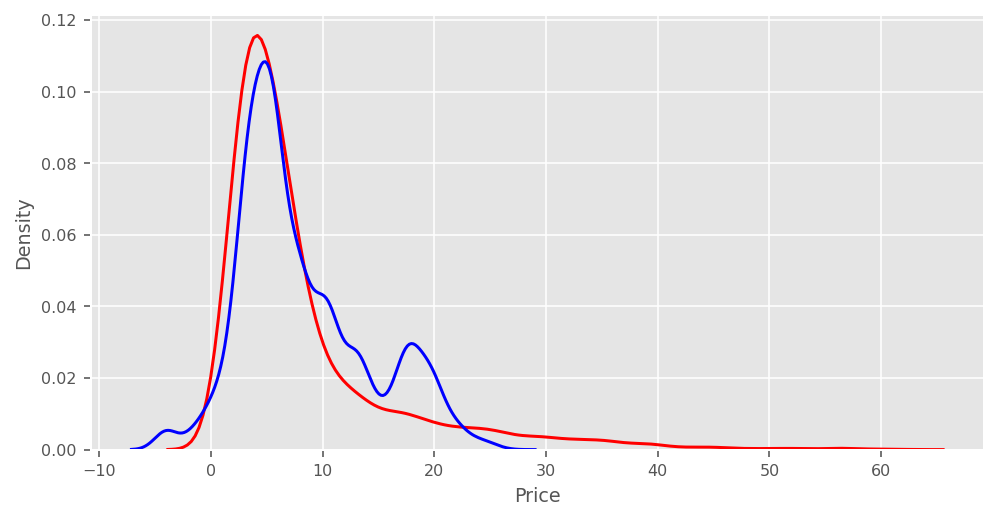

In [341]:
y_pred = reg.predict(x)
ax1 = sns.distplot(final_df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.show()

Setelah kita lakukan fitting dengan simple linear regression antara Power dan Price, didapatkan koefisien untuk power adalah 0.14 dan interceptnya adalah -6.53. Dan terlihat bahwa persebaran Price untuk predicted valuenya memang terlihat sangat berbeda dengan aslinya.

In [342]:
simple_acc = reg.score(x,y)
print('R-square is: ', simple_acc)

R-square is:  0.5290303958101719


Akurasi yang didapatkan kurang lebih 53%, cukup baik, tapi kita masih punya 3 model lainnya yang belum dicoba yang mana memiliki kemungkinan akurasinya lebih tinggi dari model ini.

In [343]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('RMSE is:',rmse)

RMSE is: 5.492966473442077


In [344]:
print('First four real data:\n', y[0:4])

First four real data:
 [[ 1.75]
 [12.5 ]
 [ 4.5 ]
 [ 6.  ]]


In [345]:
print('Fist four prediction:\n', y_pred[0:4])

Fist four prediction:
 [[ 1.62940749]
 [11.1763096 ]
 [ 5.91456902]
 [ 5.9229878 ]]


### Residual plot

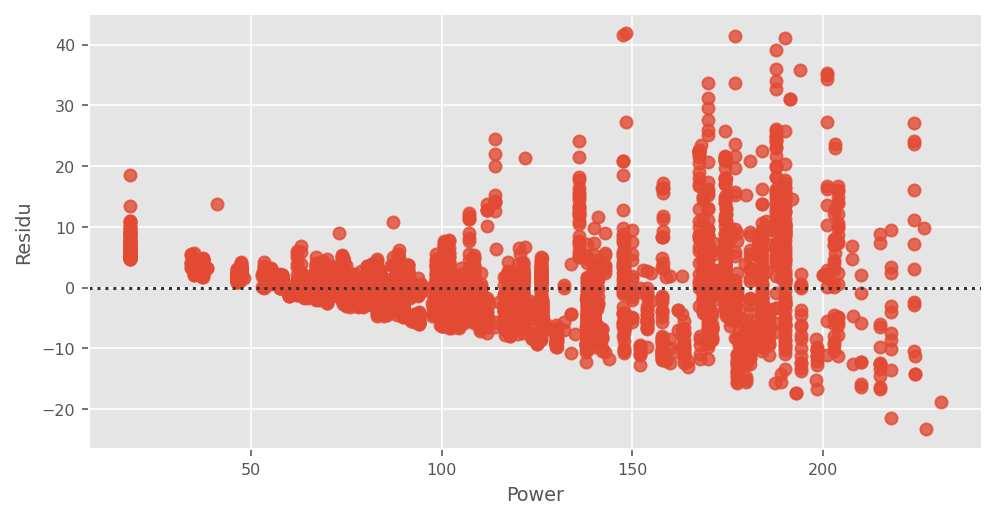

In [346]:
sns.residplot(x, y)
plt.xlabel('Power')
plt.ylabel('Residu')
plt.show()

Kumudian kita plot residual plotnya, dimana sumbu x adalah independent variabelnya atau Power, sedangkan sumbu y adalah residunya, garis putus-putus dimana residu = 0 menandakan error/selisih dari y_pred dan y sama dengan 0. Lalu kita bisa lihat ternyata titik-titiknya tidak menyebar secara merata pada sumbu x, tetapi malah membentuk seperti segitiga, ini menandakan bahwa data akan lebih baik di-fitting dengan nonlinear regression.

### Multiple Linear Regression $$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

In [347]:
x = final_df.drop(columns='Price')
y = final_df['Price']
reg.fit(x,y) 
y_pred = reg.predict(x)

Di sini kita menggunakan banyak variabel sebagai predictor yang mana bisa kita ekspektasikan hasil akurasi dengan model ini lebih tinggi.

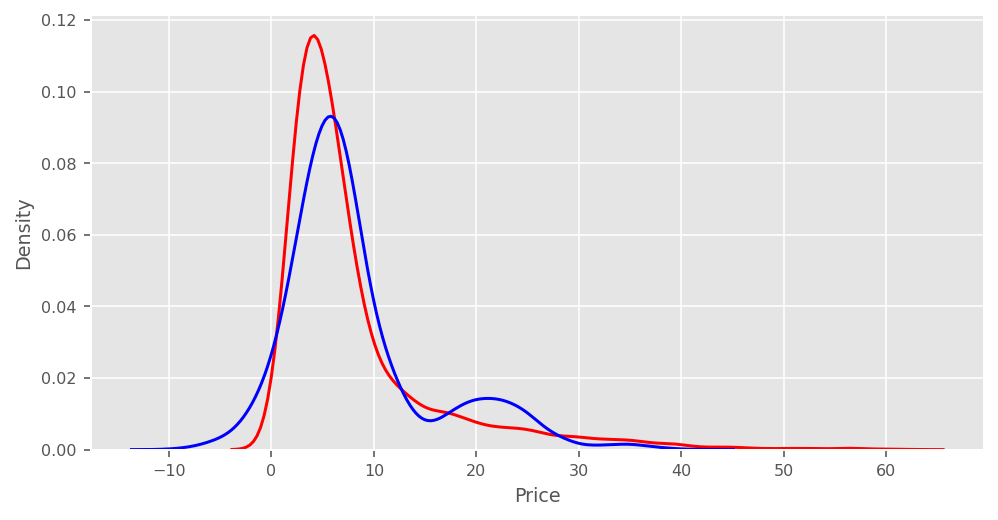

In [348]:
ax1 = sns.distplot(final_df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.show()

Terlihat bahwa persebaran datanya memang terlihat lebih baik daripada saat kita menggunakan model single linear regression, kemudian kita cek akurasinya atau r-square-nya:

In [349]:
print('R-square is: ',reg.score(x,y))

R-square is:  0.8153978948283991


Terlihat bahwa ternyata akurasinya naik sangat tinggi, sebesar 81% dibandingkan tadi kita pakai simple linear regression yang hanya 53%.

In [350]:
print('Fist four prediction: ', y_pred[0:4])

Fist four prediction:  [-0.88321129  9.85568608  2.94399418  5.62060549]


In [351]:
y_pred = reg.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('RMSE is:',rmse)

RMSE is: 3.4389735325835677


In [352]:
reg.coef_

array([ 6.85529974e-01, -3.05107090e-05,  2.99969167e-01, -1.51172536e-01,
        4.07749114e-04,  5.31091368e-02,  4.47419088e-01,  1.47520061e+00,
        5.14980226e-01,  1.66585286e+00, -6.10541587e-01,  1.38237784e+00,
        6.13632923e-01,  4.66565919e-03, -1.42664705e+00, -5.51897743e-01,
        4.28312782e-01,  1.02028857e+00,  7.88807263e+00,  9.42148313e-02,
       -9.48169500e-01, -8.16272638e-01,  4.58442928e+00,  3.14270107e+00,
       -6.16604728e+00, -7.63827646e+00, -5.90058486e+00, -6.00268240e+00,
       -5.13409816e+00, -5.44991712e+00, -5.24022620e+00, -7.92135923e+00,
       -2.59794128e+00,  1.40747597e+01, -1.16048143e+00,  1.50963471e+01,
       -6.78982004e+00, -4.70584580e+00,  5.54158007e+00,  1.06583118e+01,
       -2.56356536e+00, -5.38262569e+00, -5.97546866e+00, -4.73193399e+00,
       -6.82183617e+00, -2.29003602e+00, -5.87087677e+00,  8.21455959e-01])

In [353]:
reg.intercept_

-1373.439215417512

### Ploynomial Regression
Seperti namanya, di sini kita akan melakukan fitting terhadap data kita dengan menggunakan polynomial yang mana bisa kita ekspektasikan hasilnya akan lebih baik dari simple linear regression, tetapi apakah lebih baik dari multiple linear regression?

In [354]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 250, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [355]:
x = final_df['Power']
y = final_df['Price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

            3            2
-3.153e-06 x + 0.001838 x - 0.1513 x + 6.186


Sama seperti simple linear regression kita pakai 1 variabel sebagai predictor, yaitu Power

Kita pakai degree = 3 untuk melakukan fitting

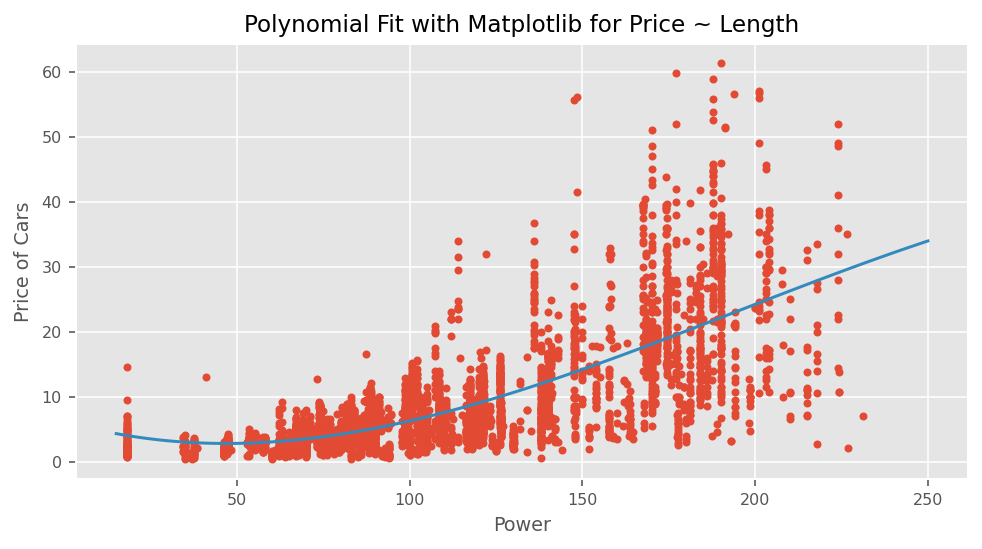

In [356]:
PlotPolly(p, x, y, 'Power')

Terlihat bahwa plotting yang dibuat memang tidak berbentuk linear, tetapi cukup mengikuti arah dari perbesaran data.

In [357]:
from sklearn.metrics import r2_score

In [358]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.5653757219438651


Setelah di-cek, ternyata akurasinya adalah 56%, lebih baik sedikt dari simple linear regression, tetapi masih sangat jauh dari multiple linear regression.

In [359]:
rmse = np.sqrt(mean_squared_error(y, p(x)))
print('RMSE is:',rmse)

RMSE is: 5.276761919725226


Namun, kita paham bahwa salah satu hyperparameter dari polynomial regression adalah degree, karena kita belum yakin maka kita coba melakukan iterasi sebanyak 99 kali dari degree 2 sampai 100, apakah di antara degree tersebut akurasinya akan mungkin lebih baik dari MLR?

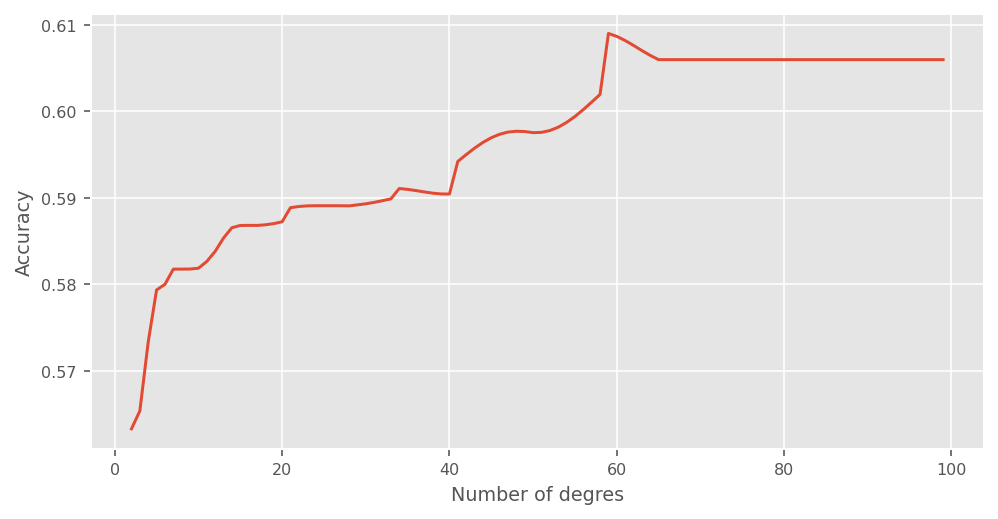

In [360]:
degres = np.arange(2,100)
accuracy = np.zeros(len(degres))
for i in degres:
    f = np.polyfit(x, y, i)
    p = np.poly1d(f)
    r_squared = r2_score(y, p(x))
    accuracy[i-2] = r_squared
plt.plot(degres, accuracy)
plt.xlabel('Number of degres')
plt.ylabel('Accuracy')
plt.show()


In [361]:
accuracy.max(), np.where(accuracy==accuracy.max())

(0.609000061935626, (array([57], dtype=int64),))

Ternyata setelah dilakukan looping pengecekan degree hingga 100 degree, didapatkan akurasi maksimumnya hanya 60.9-nya pada degree ke 57 sehingga bisa disimpulkan bahwa MLR lebih baik dari polynomial fit dengan 1 variabel saja.

### Multivariable Polynomial
Pada Multivariable polynomial ini kita akan membuat suatu varibel atau features baru yang berisi semua kombinasi features lama dengan degree kurang dari atau sama dengan degree yang dispesifikasikan. Dengan banyaknya features baru adalah N(n,d)=C(n+d,d), dimana n = jumlah features lama, d = degree, dan C = kombinasi.

In [362]:
from sklearn.preprocessing import PolynomialFeatures

In [363]:
Z = final_df.drop(columns='Price')
pr = PolynomialFeatures(degree=2)
Z_pr = pr.fit_transform(Z)

In [364]:
Z.shape

(5466, 48)

Di sini, kita punya 48 featues yang akan kita ubah menjadi polynomial features ber-degree 2 sehingga features yang baru akan berjumlah C(50,2) = 1225

In [365]:
Z_pr.shape

(5466, 1225)

Bisa dilihat features baru kita juga sesuai teori di atas.

### Standard Scaller (Z-score)

Pada tahapan Pipeline, kita akan menggunakan standarscaler sebagai tahapan awal, standarscaller adalah suatu teknik standarisasi dengan z-score yang mana data kita nantinya akan berubah menjadi memiliki mean = 0 dan standar deviasi = 1 .

In [366]:
from sklearn.preprocessing import StandardScaler

In [367]:
scaler = StandardScaler()

In [368]:
scaler.fit(Z)

StandardScaler()

In [369]:
scaler.transform(Z)

array([[-1.11561315,  0.68424084,  0.43193904, ..., -0.25915491,
        -0.24478267, -0.0606005 ],
       [ 0.46909098, -0.46693551,  0.43193904, ..., -0.25915491,
        -0.24478267, -0.0606005 ],
       [-0.79867233, -0.28126191,  0.43193904, ..., -0.25915491,
        -0.24478267, -0.0606005 ],
       ...,
       [-0.4817315 ,  0.05295058, -1.85140603, ..., -0.25915491,
        -0.24478267, -0.0606005 ],
       [-0.16479067, -0.28126191,  0.43193904, ..., -0.25915491,
        -0.24478267, -0.0606005 ],
       [-0.79867233, -0.24412719,  0.43193904, ..., -0.25915491,
        -0.24478267, -0.0606005 ]])

In [370]:
scaler.transform(Z).mean(axis=0)

array([ 2.02262892e-14, -4.93974094e-17,  3.75680298e-16,  5.82369458e-16,
        1.94989774e-16,  3.82179957e-16,  2.78185411e-16,  4.22477843e-17,
        5.19972730e-17,  1.68991137e-17,  3.89979548e-17, -4.93974094e-17,
       -5.19972730e-18,  1.29993183e-17,  1.29993183e-17,  1.81990456e-17,
        6.49965913e-19, -5.06973412e-17, -2.59986365e-18, -2.59986365e-18,
        4.80974775e-17,  3.89979548e-17, -4.74475116e-17,  4.41976821e-17,
       -1.03994546e-17, -4.54976139e-18,  1.29993183e-17, -1.03994546e-17,
        2.33987729e-17,  3.37982275e-17,  4.41976821e-17, -1.29993183e-18,
        6.49965913e-18,  1.81990456e-17,  5.19972730e-18,  0.00000000e+00,
       -1.94989774e-17,  3.89979548e-18,  6.49965913e-19,  1.03994546e-17,
       -3.89979548e-18,  1.94989774e-17,  3.89979548e-18,  6.49965913e-18,
        2.27488069e-17, -6.49965913e-18,  4.02978866e-17,  1.81990456e-17])

In [371]:
scaler.transform(Z).std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Pipeline
Pipeline merupakan suatu teknik untuk menggabungkan beberapa proses, di sini kami membuat pipeline yang memiliki urutan proses:
<lu>
    <li>Pre-processing dengan standarisasi z-score</li>
    <li>Melakukan pengubahan featues dengan polynomial sebanyak 2 degree</li>
    <li>Melakukan fitting polynomial featues tsb dengan Linear regression</li>
</lu>
Sehingga bisa dikatakan bahwa hasil model ini adalah Polynomial Linear Regression

In [372]:
from sklearn.pipeline import Pipeline

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [373]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [374]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([ 2.17497015, 10.38354492,  2.87617922,  5.49409819])

In [375]:
rmse = np.sqrt(mean_squared_error(y, ypipe))
rmse

1.8331416602848984

In [376]:
pipe.score(Z, y)

0.9475469148459356

Terlihat bahwa akurasi paling tinggi adalah saat kita menggunakan pipeline yang menggunakan model Polynomial Linear Regression (PLR), akurasinya sangat tinggi, yaitu sebesar 94.75%. ***Namun, apakah model ini tidak overfitting?***

## Model Evaluation and Refinement

In [377]:
final_df

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Bangalore,Chennai,...,Mercedes-Benz,Mini,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2010,72000,4,26.60,998,58.16,5.0,1.75,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,4,19.67,1582,126.20,5.0,12.50,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,4,18.20,1199,88.70,5.0,4.50,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,4,20.77,1248,88.76,7.0,6.00,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,3,15.20,1968,140.80,5.0,17.74,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,2014,27365,4,28.40,1248,74.00,5.0,4.75,0,0,...,0,0,0,0,0,0,0,0,0,0
5462,2015,100000,4,24.40,1120,71.00,5.0,4.00,0,0,...,0,0,0,0,0,0,0,0,0,0
5463,2012,55000,3,14.00,2498,112.00,8.0,2.90,0,0,...,0,0,0,0,0,0,0,0,0,0
5464,2013,46000,4,18.90,998,67.10,5.0,2.65,0,0,...,0,0,0,0,0,0,0,0,0,0


In [378]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [379]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [380]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### Training and Testing (using Polynomial Linear Regression)

In [381]:
reg = LinearRegression()
x = final_df.drop('Price', axis=1)
y = final_df['Price'].to_numpy().reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=102) 
x_train = x_train.astype(float)
x_train = pr.fit_transform(x_train)
x_test = x_test.astype(float)
x_test = pr.fit_transform(x_test)
reg.fit(x_train, y_train)

LinearRegression()

In [382]:
reg.fit(x_train, y_train)
print('R-squared untuk train data:', reg.score(x_train, y_train))
print('R-squared untuk test data:', reg.score(x_test, y_test))

R-squared untuk train data: 0.9500726615430939
R-squared untuk test data: 0.4306579501964475


Ternyata dengan menggunakan model Polynomial Linear Regression, akurasi yang didapatkan untuk train sangat tinggi, sebesar 95%, tetapi saat kita coba testing dengan istilahnya unknown data hasil akurasinya sangat jauh, sebesar 43% saja. Ini menandakan model yang kita buat **overfittig** karena model tsb sangat bagus sangat memprediksi data yang sudah diketahui, tetapi saat diberikan data baru model kita menjadi "jelek".

In [383]:
y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)

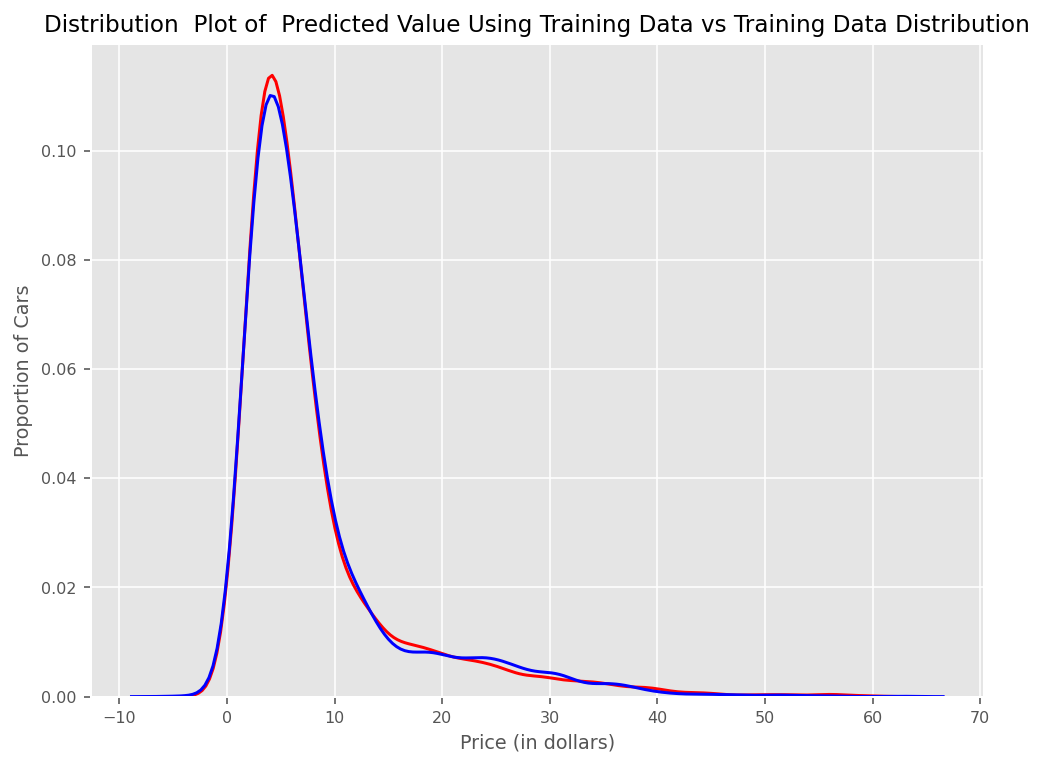

In [384]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, y_pred_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

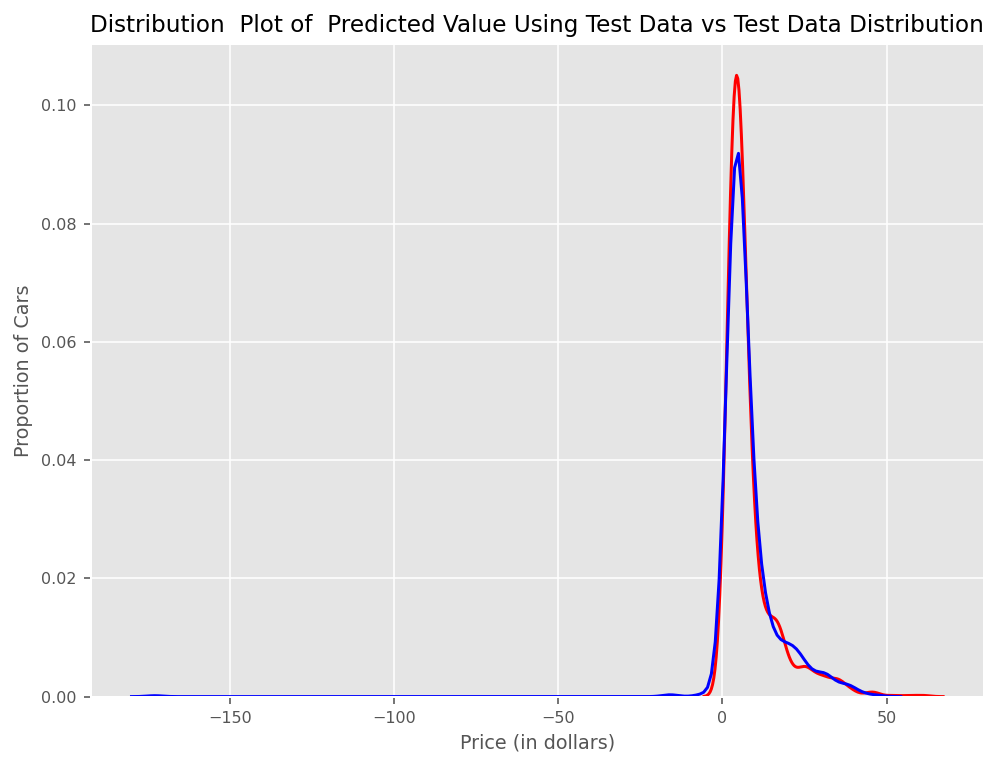

In [385]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution'
DistributionPlot(y_test, y_pred_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

### Training and Testing (using Multiple Linear Regression)

In [386]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=102) 
reg.fit(x_train, y_train)

LinearRegression()

In [387]:
print('R-squared untuk train data:', reg.score(x_train, y_train))
print('R-squared untuk test data:', reg.score(x_test, y_test))

R-squared untuk train data: 0.8209308391923668
R-squared untuk test data: 0.7887194619886797


Terlihat apabila kita menggunakan Multiple Linear Regression, hasil yang didapatkan cukup baik dengan akurasi untuk train 82% dan untuk test 78%. Ini menandakan bahwa model yang dibuat **tidak overfitting**

In [388]:
y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)

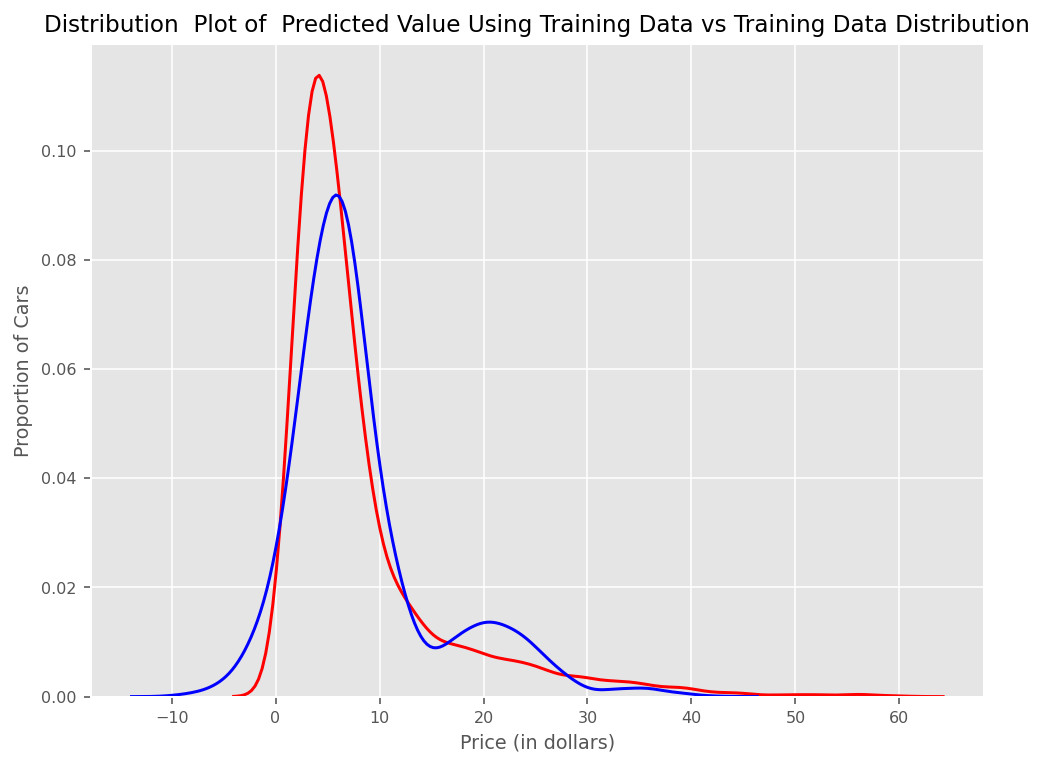

In [389]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, y_pred_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

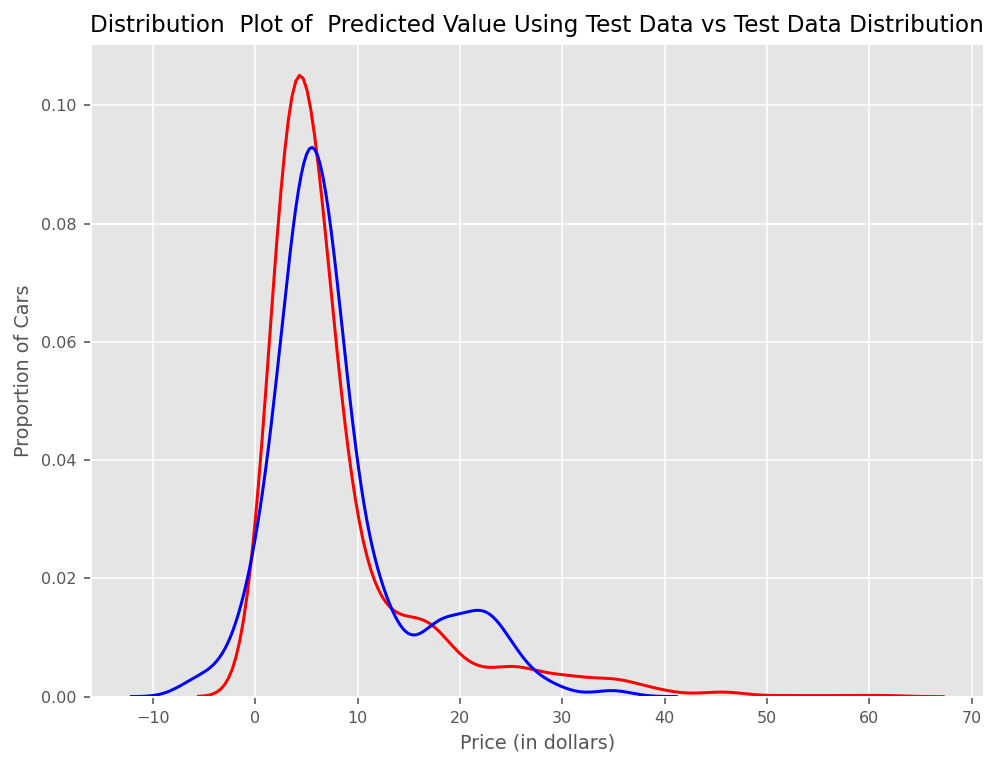

In [390]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution'
DistributionPlot(y_test, y_pred_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

### Cross Validation

In [391]:
from sklearn.model_selection import cross_val_score 

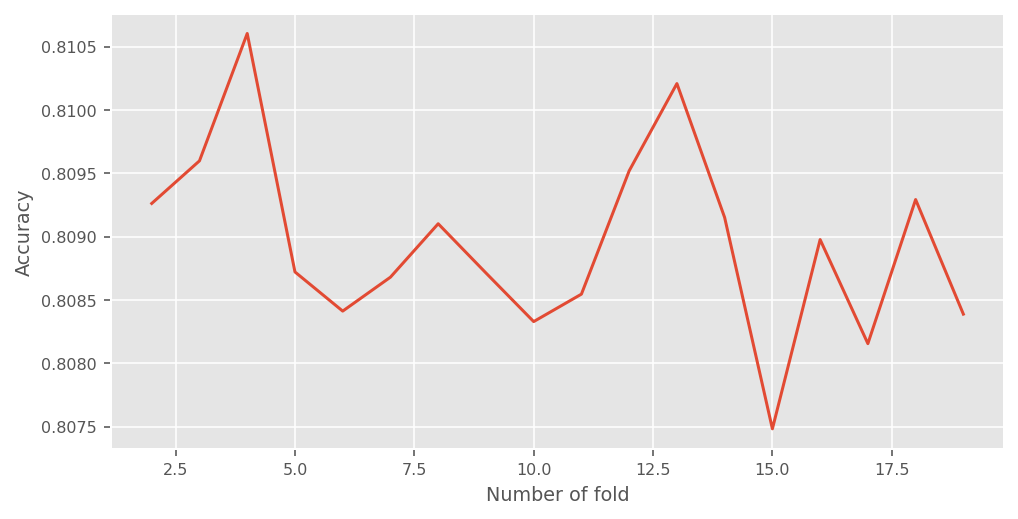

In [392]:
fold = np.arange(2,20)
accuracy = np.zeros(len(fold))
test_accuracy = np.zeros(len(fold))
for i in fold:
    reg = LinearRegression()
    cv_result = cross_val_score(reg, x, y, cv = i)
    accuracy[i-2] = np.mean(cv_result)
plt.plot(fold, accuracy)
plt.xlabel('Number of fold')
plt.ylabel('Accuracy')
plt.show()

Kita lakukan looping untuk mengiterasi nilai fold, di sini kami memilih nilai fold dari 2 sampai 20, dimana akan kita pilih saat dimana fold-nya tidak overfitting, pilih nilai accuracy yang paling besar.

In [393]:
accuracy

array([0.80926251, 0.80959885, 0.81060419, 0.80872186, 0.80841264,
       0.80868055, 0.80910223, 0.80871376, 0.80832981, 0.80854652,
       0.80951966, 0.8102088 , 0.8091513 , 0.80748323, 0.80897722,
       0.80815587, 0.80929322, 0.80838872])

In [394]:
accuracy.max(), np.where(accuracy==accuracy.max())

(0.8106041930577007, (array([2], dtype=int64),))

### Training and Testing (using Multiple Linear Regression, k = 4)

In [395]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=100/4/100, random_state=102) 
reg.fit(x_train, y_train)

LinearRegression()

In [396]:
print('R-squared untuk train data:', reg.score(x_train, y_train))
print('R-squared untuk test data:', reg.score(x_test, y_test))

R-squared untuk train data: 0.8177727806184882
R-squared untuk test data: 0.8053204579932048


In [397]:
y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)

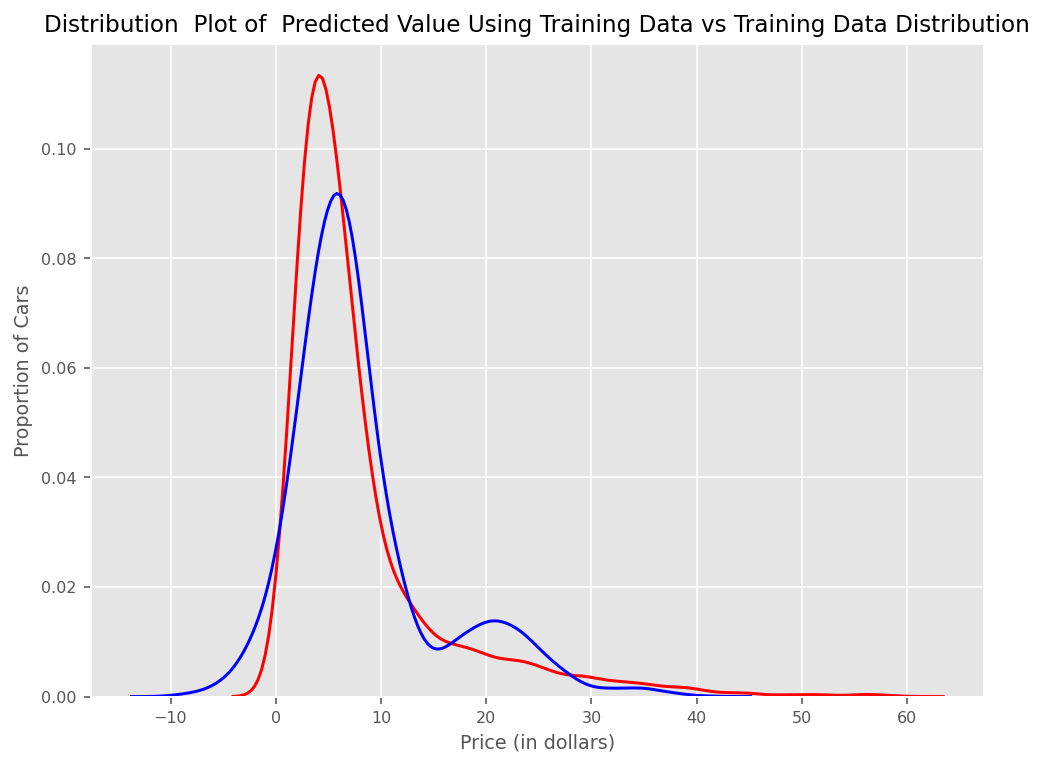

In [398]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, y_pred_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

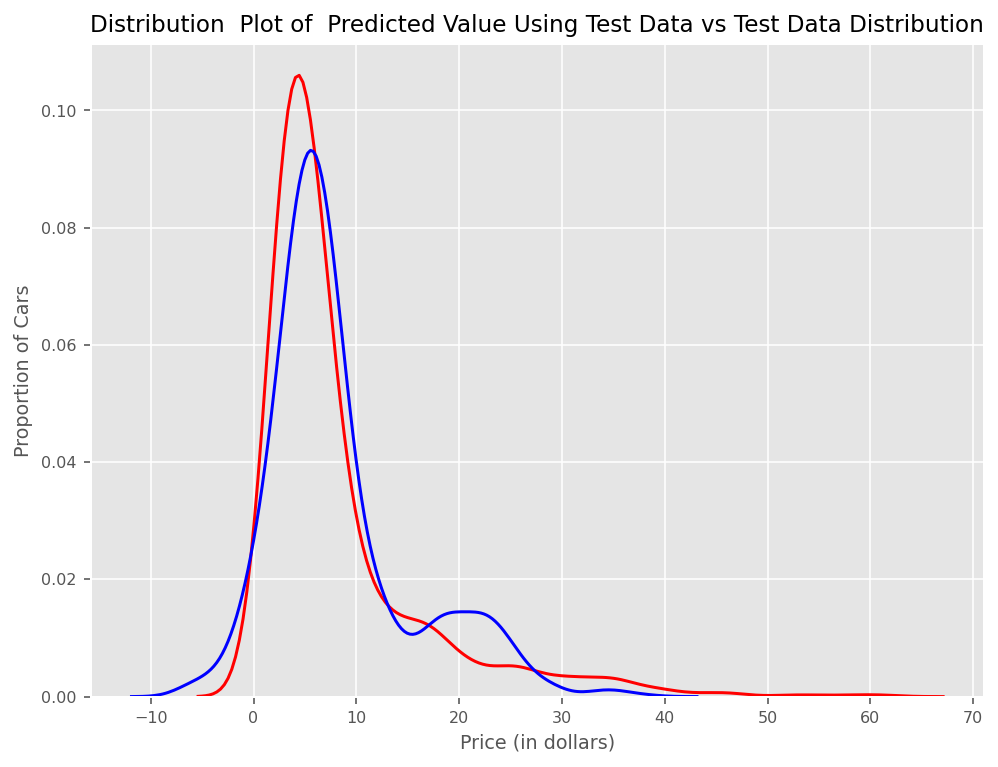

In [399]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution'
DistributionPlot(y_test, y_pred_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

### Ridge Regression
Lanjut karena kita lihat pada Model selection kita awalnya memilih Polynomial Linear Regression karena memiliki akurasi 94.75%, tetapi ternyata setelah kita lakukan training dan testing didapatkan bahwa model ini "jelek" jika disuruh memprediksi unseen data atau overfit sehingga kami putuskan untuk memakai Multiple Linear Regression. Namun, ternyata ada suatu metode yang bisa mengatasi masalah tadi, yaitu dengan menggunakan Ridge Regression, mirip seperti Polynomial Linear Regression, di sini kita akan melakukan features scaling dengan polynomial features sehingga jumlah features kita bertambah lalu alih-alih melakukan fitting dengan Linear Regression, di sini kita akan melakukan fitting dengan Ridge Regression. Ridge mempunyai hyperparamter alpha yang berfungsi untuk mengatur besar kecilnya koefisien features, makin besar alpha maka koefisien makin besar.

In [400]:
from sklearn.linear_model import Ridge

In [401]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

#### alpha = 10000

In [402]:
RigeModel=Ridge(alpha=10000)
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=10000)

In [403]:
RigeModel.score(x_train_pr, y_train)

0.9073007084374286

In [404]:
RigeModel.score(x_test_pr, y_test)

0.8890184052584525

#### alpha = 100

In [405]:
RigeModel=Ridge(alpha=100)
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=100)

In [406]:
RigeModel.score(x_train_pr, y_train)

0.9279557540610842

In [407]:
RigeModel.score(x_test_pr, y_test)

0.8841666626072219

Di sini sebelum dilakukan fitting dengan ridge regression, kami lakukan penambahan features dg mentode polynomial kamudian kita lakukan ujicoba dua alpha yang berbeda, yaitu 10000 dan 100. Didapatkan bahwa semakin besar alpha maka akan mengakibatkan semkain underfitting (akurasi training berkurang) tetapi akurasi test meningkat, sedangkan semakin kecil alpha maka akan semakin overfitting (akurasi training meningkat), tetapi akurasi test menurun. Oleh karena itu, bisa dikatakan baha semakin tinggi alpha akan semakin mencegah overfitting.

In [408]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,100))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|███████████████████████████████████████████| 100/100 [00:24<00:00,  4.03it/s, Test Score=0.895, Train Score=0.919]


Untuk lebih jelas lagi kita juga akan mengiterasi nilai alpha dari 0 sampai 1000 dan kemudian kita plot.

In [409]:
(np.array(Rsqu_train) - np.array(Rsqu_test)).min()

0.023630306502167797

In [410]:
np.where((np.array(Rsqu_train) - np.array(Rsqu_test)) == (np.array(Rsqu_train) - np.array(Rsqu_test)).min())

(array([99], dtype=int64),)

In [411]:
Rsqu_test.remove(Rsqu_test[0])

In [412]:
Rsqu_train.remove(Rsqu_train[0])

In [413]:
Alpha = 10 * np.array(range(0,99))

In [414]:
Rsqu_test[0], Rsqu_train[0]

(0.8781508285980111, 0.9374045680675853)

In [415]:
Rsqu_test[-1], Rsqu_train[-1]

(0.8954672524072552, 0.919097558909423)

[]

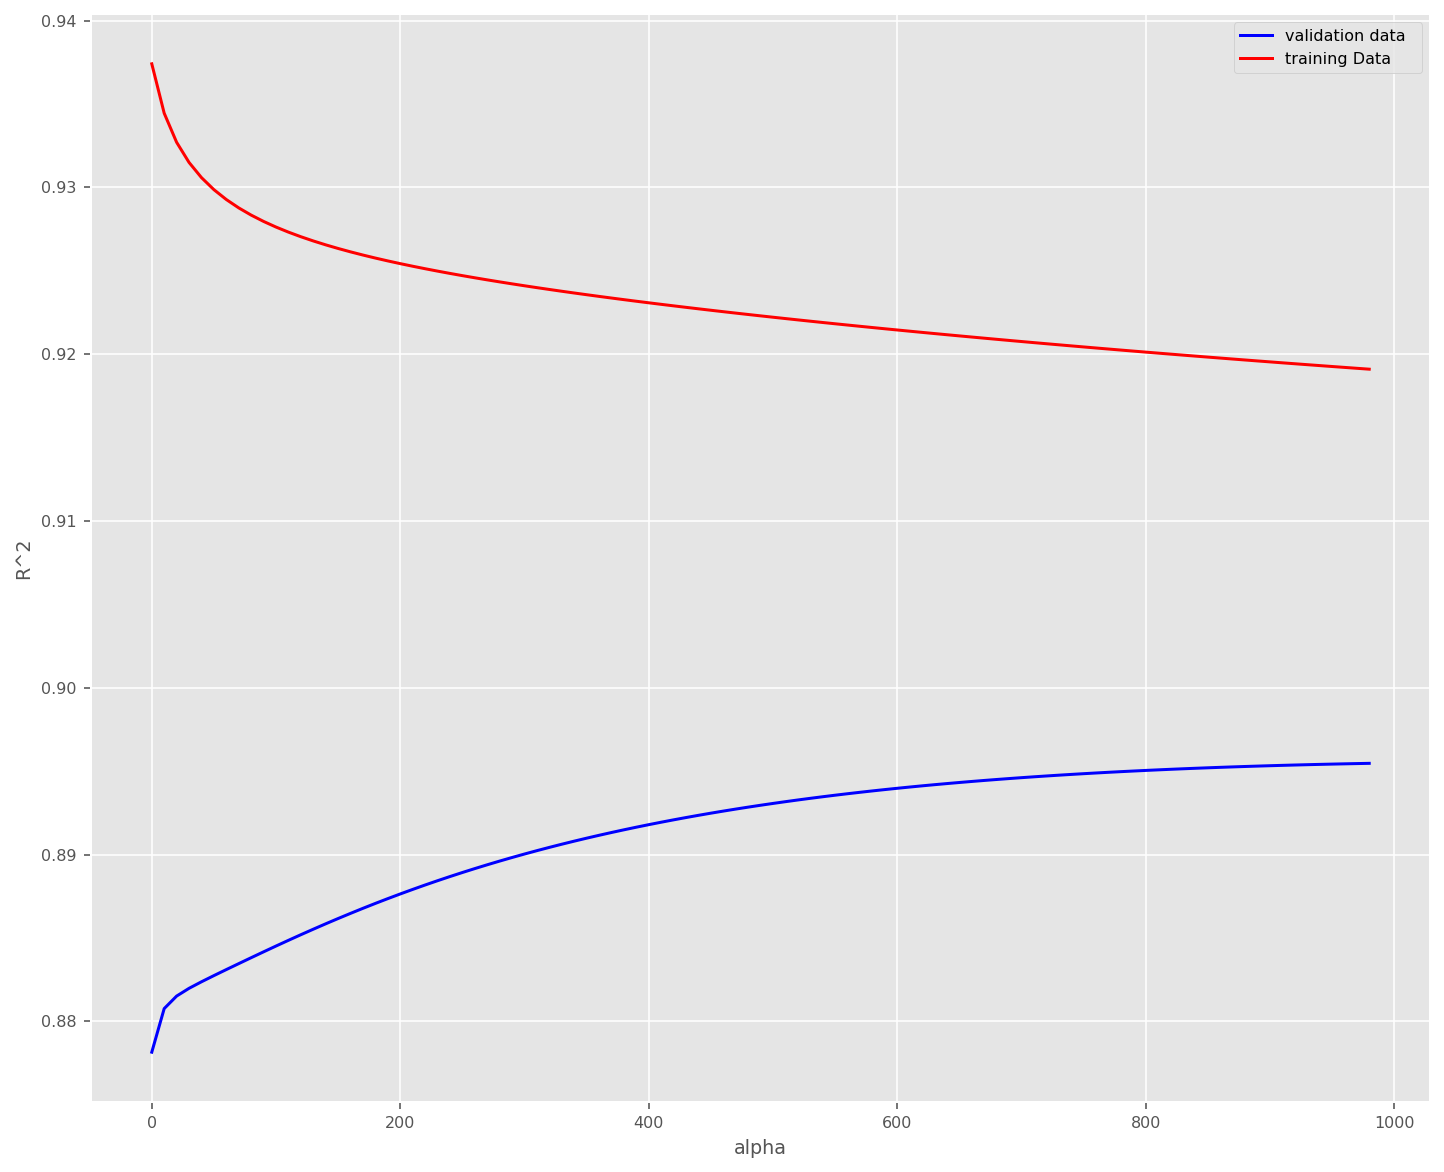

In [416]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test,'b', label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.plot()

Setelah kita plot perubahan alpha terhadap nilai R square train dan test didapatkan bahwa alpha yang maksimum memamng merupakan alpha terbaik karena nilai akurasi test besar, tetapi nilai training kecil sehingga tidak overfiting.

### Grid Search
Grid search akan kita gunakan untuk menentukan hyperparamter terbaik dari model yang kita buat karena di dalam model di bawah akan melewati beberapa proses seperti penentuan alpha, k-fold serta apakah mau dinormalisasi atau tidak

In [417]:
from sklearn.model_selection import GridSearchCV

In [418]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [419]:
RR=Ridge()
RR

Ridge()

In [420]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [421]:
Grid1.fit(x, y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [422]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=0.1)

In [423]:
BestRR.score(x_train, y_train)

0.8169121045787289

In [424]:
BestRR.score(x_test, y_test)

0.811136877318803

Didapatkan nilai alpha terbaik adalah 0.1, tanpa hyperparamter normalize yang tidak dicek.

In [426]:
# Write your code below and press Shift+Enter to execute 
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x,y)
Grid2.best_estimator_

Ridge(alpha=0.001, normalize=True)

In [427]:
BestRR=Grid2.best_estimator_
BestRR

Ridge(alpha=0.001, normalize=True)

In [428]:
BestRR.score(x_train, y_train)

0.816915400717784

In [429]:
BestRR.score(x_test, y_test)

0.8110563982579698

Didapatkan hyperparamter terbaik jika kita masukkan normalize sebagai perhitungan parameter adalah alpha = 0.001 dan normalizenya True

### Kesimpulan:
<lu>
    <li>Setelah dilakukan test pearson, t-test dan ANOVA, didapatkan bahwa semua features bisa digunakan dalam melakukan prediksi atau membuat model</li>
    <li>Di sini kami membuat 4 model di awal, Simple Linear Regression, Multiple Linear Regression, Polynomial Fit, dan Multivarite Polynomial Linear Regression</li>
    <li>Didapatkan ternya Multivariate Linear Regression memiliki akurasi paling tinggi, yaitu sebsar 94.75% untuk memprediksi data (tanpa train-test)</li>
    <li>Setelah dilakukan train-test, ternyata Multivariate malah membuat model yang overfit (train: 95%, test: 43%) sehingga kami memutuskan untuk menggunakan Multiple Linear Regression</li>
    <li>Akurasi saat menggunakan Multiple Linear Regression adalah train: 82%, test: 78%.8 sehingga bisa dikatakan tidak overfit</li>
    <li>Dengan cross validation didapatkan k terbaik atau yang rata-rata akurasinya terbesar adalah saat k = 4 atau pembagian 25% sebagai test dan 75% train</li>
    <li>Saat di-test lagi dengan membagi train-test secara manual dengan pembagian di atas, didapatlan train: 81.7% dan test: 80.5%</li>
    <li>Karena di awal kita gagal menggunakan model Multivariate Linear Regression maka kita coba gunakan Ridge Regression yang mana mirirp kita ubah dulu featuesnya kemudian lakukan fit, bedanya fitting dilakukan dengan Ridge regression</li>
    <li>Ternyata model tidak overfitting dengan nilai alpha terbaik adalah yang tersebsar atau 990 dengan akurasi test: 89.5% dan train: 91.9%</li>
    <li>Saat kita cari hyperparameter terbaik denganGrid Search didapatkan nilai hyperparameter terbaik adalah saat: alpha = 0.001, k-fold = 4, dan ninormalisasi</li>
    <li>Model terbaik yang kita pilih adalah <b>Polynomial Ridge Regression</b> yang berarti kita lakukan features scaling dulu kemudian di-fitkan dengan Ridge Regression dimana alpha terbaik adalah yang terbesar</li>
</lu>    